## Importing Required Libraries

In this cell, we import essential Python libraries for data analysis, visualization, and statistical computations.

- `pandas` and `numpy`: For data manipulation and numerical operations.
- `matplotlib.pyplot` and `seaborn`: For creating static and interactive visualizations.
- `os`: To handle file system operations.
- `scipy.stats.mstats.winsorize`, `scipy.stats`, `zscore`, `ttest_ind`, `f_oneway`: For statistical transformations and hypothesis testing.

These libraries support the core tasks for Exploratory Data Analysis (EDA), such as:
- Cleaning and visualizing ESG metrics.
- Applying winsorization and z-score based outlier detection.
- Conducting hypothesis testing (e.g., t-tests, ANOVA) across ESG categories and industries.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats.mstats import winsorize
from scipy.stats import zscore, ttest_ind, f_oneway

In [36]:
# Base path from home directory (universal across machines)
base_path = os.path.expanduser("~")

# Project-level directory (update only this if the structure changes)
project_path = os.path.join(base_path, "Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project")

# Define reusable data paths
raw_folder_path = os.path.join(project_path, "data/raw/Raw data ESG data 2025Feb")
processed_folder_path = os.path.join(project_path, "data/processed")
industry_file_path = os.path.join(project_path, "data/raw/industry.csv")
metric_summary_path = os.path.join(project_path, "data/raw/metric_summary.csv")

social_opportunity_cleaned_path = os.path.join(processed_folder_path, "esg_social_opportunity_cleaned.csv")

# List of cleaned files
cleaned_files = [
    "esg_environmental_risk_cleaned.csv",
    "esg_environmental_opportunity_cleaned.csv",
    "esg_social_risk_cleaned.csv",
    "esg_social_opportunity_cleaned.csv",
    "esg_governance_risk_cleaned.csv",
    "esg_governance_opportunity_cleaned.csv"
]

industry_cleaned_files = {
    "env_risk": "esg_environmental_risk_cleaned_industry.csv",
    "env_opportunity": "esg_environmental_opportunity_cleaned_industry.csv",
    "soc_risk": "esg_social_risk_cleaned_industry.csv",
    "soc_opportunity": "esg_social_opportunity_cleaned_industry.csv",
    "gov_risk": "esg_governance_risk_cleaned_industry.csv",
    "gov_opportunity": "esg_governance_opportunity_cleaned_industry.csv"
}


# ESG categories and corresponding files
normalized_analyzed_files = {
    "Environmental Risk": "esg_environmental_risk_cleaned_industry_normalized.csv",
    "Environmental Opportunity": "esg_environmental_opportunity_cleaned_industry_normalized.csv",
    "Social Risk": "esg_social_risk_cleaned_industry_normalized.csv",
    "Social Opportunity": "esg_social_opportunity_cleaned_industry_normalized.csv",
    "Governance Risk": "esg_governance_risk_cleaned_industry_normalized.csv",
    "Governance Opportunity": "esg_governance_opportunity_cleaned_industry_normalized.csv"
}

normalized_folder_path = os.path.join(project_path, "data/processed/normalized")
updated_pillar_path = os.path.join(project_path, "Normalized_Data")


##  ESG Raw Data Processing and ESG Pillar Segregation

This cell performs the following key tasks:

1. **Path Setup**:
   - Defines the input directory for raw ESG files and an output directory for processed files.
   - Ensures that the output directory exists using `os.makedirs`.

2. **File Collection**:
   - Lists all relevant ESG CSV files sourced from Clarity AI / Eurofidai dataset for the project.

3. **Reading and Filtering by ESG Pillar**:
   - Iteratively reads each CSV file using the pipe (`|`) delimiter.
   - Filters rows based on the `pillar` column: Environmental (`E`), Social (`S`), and Governance (`G`).
   - Each filtered subset is stored in a separate list for aggregation.

4. **Concatenation and Export**:
   - Combines all Environmental, Social, and Governance records into three respective DataFrames.
   - Saves the filtered and consolidated outputs as:
     - `esg_environmental_data.csv`
     - `esg_social_data.csv`
     - `esg_governance_data.csv`

This sets up the foundation for pillar-wise analysis, enabling dedicated pipelines for risk and opportunity metrics in each ESG dimension.

**Why this matters**: ESG pillars are central to ontology mapping and PCA models. Having clean, separated datasets ensures that domain-specific models (e.g., Environmental Risk PCA) work with precisely scoped features.

In [8]:

# Ensure the processed folder exists
os.makedirs(processed_folder_path, exist_ok=True)

# List of ESG raw data files
csv_files = [
    "esg_raw_data_on_corporations_myu_5.csv",
    "esg_raw_data_on_corporations_myu_2.csv",
    "esg_raw_data_on_corporations_1.csv",
    "esg_raw_data_on_corporations_myu_4.csv",
    "esg_raw_data_on_corporations_myu_3.csv",
    "esg_raw_data_on_corporations_7.csv",
    "esg_raw_data_on_corporations_6.csv"
]

# Initialize empty lists for E, S, and G dataframes
e_dataframes = []
s_dataframes = []
g_dataframes = []

# Loop through each file and read the data
for filename in csv_files:
    file_path = os.path.join(raw_folder_path, filename)

    try:
        # Read CSV file with correct delimiter
        df = pd.read_csv(file_path, delimiter='|', encoding='utf-8')

        # Ensure 'pillar' column exists before filtering
        if 'pillar' in df.columns:
            e_dataframes.append(df[df['pillar'] == 'E'])
            s_dataframes.append(df[df['pillar'] == 'S'])
            g_dataframes.append(df[df['pillar'] == 'G'])

            print(f"Processed {filename}: E({len(e_dataframes[-1])}), S({len(s_dataframes[-1])}), G({len(g_dataframes[-1])})")
        else:
            print(f"Skipping {filename} - 'pillar' column missing.")

    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Combine all files into one per category
df_e = pd.concat(e_dataframes, ignore_index=True)
df_s = pd.concat(s_dataframes, ignore_index=True)
df_g = pd.concat(g_dataframes, ignore_index=True)

# Save the new CSV files in the processed directory
df_e.to_csv(os.path.join(processed_folder_path, "esg_environmental_data.csv"), index=False, sep='|')
df_s.to_csv(os.path.join(processed_folder_path, "esg_social_data.csv"), index=False, sep='|')
df_g.to_csv(os.path.join(processed_folder_path, "esg_governance_data.csv"), index=False, sep='|')

print("CSV files saved successfully in the processed folder:")
print(f"- Environmental Data: {len(df_e)} rows")
print(f"- Social Data: {len(df_s)} rows")
print(f"- Governance Data: {len(df_g)} rows")


Processed esg_raw_data_on_corporations_myu_5.csv: E(396333), S(51959), G(74546)
Processed esg_raw_data_on_corporations_myu_2.csv: E(894601), S(196542), G(231277)
Processed esg_raw_data_on_corporations_1.csv: E(1269834), S(768008), G(726410)
Processed esg_raw_data_on_corporations_myu_4.csv: E(624877), S(74975), G(112890)
Processed esg_raw_data_on_corporations_myu_3.csv: E(767791), S(100980), G(155926)
Processed esg_raw_data_on_corporations_7.csv: E(50502), S(14844), G(21025)
Processed esg_raw_data_on_corporations_6.csv: E(190863), S(25985), G(40755)
CSV files saved successfully in the processed folder:
- Environmental Data: 4194801 rows
- Social Data: 1233293 rows
- Governance Data: 1362829 rows


##  Industry Alignment and ESG Category Segmentation

This cell performs a multi-step transformation on the cleaned ESG data:

---

###  1. File Setup and Loading
- Reads:
  - The **Metric Summary file** (provides `metric_name` → `category` mapping).
  - The **Industry reference file** (maps `perm_id` and `company_name` to industry).
  - The **processed ESG pillar files** (Environmental, Social, Governance).

---

###  2. Company-to-Industry Matching (Dual Strategy)

To ensure high industry match coverage:
- **Primary Join**: Uses `perm_id` for precise joins with the `industry_data` file.
- **Fallback Join**: Matches using `company_name` for rows with missing or unmatched `perm_id`.
- **Post-merge Cleanup**:
  - Fills `Industry` using `Industry_name` when `Industry_perm` is missing.
  - Drops temporary merge columns like `Industry_perm`, `Industry_name`, and `Company Name`.

---

###  3. ESG Category-Level Filtering Using Metric Summary

Metrics are categorized using the `category` column from `metric_summary.csv`, split as follows:

- Environmental:
  - `Environmental Risk`
  - `Environmental Opportunity`
- Social:
  - `Social Risk`
  - `Social Opportunity`
- Governance:
  - `Governance Risk`
  - `Governance Opportunity`

Each subset is filtered using `df[df['metric_name'].isin(...)]`, resulting in six distinct datasets.

---

### 4. Output
All six category-level CSVs are saved using `|` as the delimiter:

- `esg_environmental_risk.csv`
- `esg_environmental_opportunity.csv`
- `esg_social_risk.csv`
- `esg_social_opportunity.csv`
- `esg_governance_risk.csv`
- `esg_governance_opportunity.csv`

---

### 5. Final Checks
The script concludes by printing a summary of any rows with missing `Industry` values, verifying that fallback matching successfully filled previously unmatched entries.

In [10]:

# Load the Metric Summary file
metric_summary = pd.read_csv(metric_summary_path)

# Load the Industry file
industry_data = pd.read_csv(industry_file_path)

# Ensure 'perm_id' and 'Industry' columns exist
if 'perm_id' not in industry_data.columns or 'Industry' not in industry_data.columns or 'Company Name' not in industry_data.columns:
    raise ValueError("Industry file must contain 'perm_id', 'Industry', and 'Company Name' columns.")

# Load processed ESG files
e_file = os.path.join(processed_folder_path, "esg_environmental_data.csv")
s_file = os.path.join(processed_folder_path, "esg_social_data.csv")
g_file = os.path.join(processed_folder_path, "esg_governance_data.csv")

df_e = pd.read_csv(e_file, delimiter='|', encoding='utf-8')
df_s = pd.read_csv(s_file, delimiter='|', encoding='utf-8')
df_g = pd.read_csv(g_file, delimiter='|', encoding='utf-8')

# Merge industry data into ESG datasets using 'perm_id' first
df_e = df_e.merge(industry_data[['perm_id', 'Industry']], on='perm_id', how='left')
df_s = df_s.merge(industry_data[['perm_id', 'Industry']], on='perm_id', how='left')
df_g = df_g.merge(industry_data[['perm_id', 'Industry']], on='perm_id', how='left')

# If 'Industry' is missing, try matching with 'Company Name'
df_e = df_e.merge(industry_data[['Company Name', 'Industry']], left_on='company_name', right_on='Company Name', how='left', suffixes=('_perm', '_name'))
df_s = df_s.merge(industry_data[['Company Name', 'Industry']], left_on='company_name', right_on='Company Name', how='left', suffixes=('_perm', '_name'))
df_g = df_g.merge(industry_data[['Company Name', 'Industry']], left_on='company_name', right_on='Company Name', how='left', suffixes=('_perm', '_name'))

# Fill missing values: Use 'Industry_name' if 'Industry' is still NaN
df_e.loc[:, 'Industry'] = df_e['Industry_perm'].fillna(df_e['Industry_name'])
df_s.loc[:, 'Industry'] = df_s['Industry_perm'].fillna(df_s['Industry_name'])
df_g.loc[:, 'Industry'] = df_g['Industry_perm'].fillna(df_g['Industry_name'])

# Drop extra columns after merging
df_e.drop(columns=['Industry_perm', 'Industry_name', 'Company Name'], inplace=True, errors='ignore')
df_s.drop(columns=['Industry_perm', 'Industry_name', 'Company Name'], inplace=True, errors='ignore')
df_g.drop(columns=['Industry_perm', 'Industry_name', 'Company Name'], inplace=True, errors='ignore')

# Ensure no missing industries
df_e.loc[:, 'Industry'] = df_e['Industry'].fillna("Unknown")
df_s.loc[:, 'Industry'] = df_s['Industry'].fillna("Unknown")
df_g.loc[:, 'Industry'] = df_g['Industry'].fillna("Unknown")

# Split the datasets using the Metric Summary
e_risk_metrics = metric_summary[metric_summary['category'] == 'Environmental Risk']['metric_name'].tolist()
e_opportunity_metrics = metric_summary[metric_summary['category'] == 'Environmental Opportunity']['metric_name'].tolist()

df_e_risk = df_e[df_e['metric_name'].isin(e_risk_metrics)]
df_e_opportunity = df_e[df_e['metric_name'].isin(e_opportunity_metrics)]

s_risk_metrics = metric_summary[metric_summary['category'] == 'Social Risk']['metric_name'].tolist()
s_opportunity_metrics = metric_summary[metric_summary['category'] == 'Social Opportunity']['metric_name'].tolist()

df_s_risk = df_s[df_s['metric_name'].isin(s_risk_metrics)]
df_s_opportunity = df_s[df_s['metric_name'].isin(s_opportunity_metrics)]

g_risk_metrics = metric_summary[metric_summary['category'] == 'Governance Risk']['metric_name'].tolist()
g_opportunity_metrics = metric_summary[metric_summary['category'] == 'Governance Opportunity']['metric_name'].tolist()

df_g_risk = df_g[df_g['metric_name'].isin(g_risk_metrics)]
df_g_opportunity = df_g[df_g['metric_name'].isin(g_opportunity_metrics)]

# Save the final split files in the processed directory
df_e_risk.to_csv(os.path.join(processed_folder_path, "esg_environmental_risk.csv"), index=False, sep='|')
df_e_opportunity.to_csv(os.path.join(processed_folder_path, "esg_environmental_opportunity.csv"), index=False, sep='|')

df_s_risk.to_csv(os.path.join(processed_folder_path, "esg_social_risk.csv"), index=False, sep='|')
df_s_opportunity.to_csv(os.path.join(processed_folder_path, "esg_social_opportunity.csv"), index=False, sep='|')

df_g_risk.to_csv(os.path.join(processed_folder_path, "esg_governance_risk.csv"), index=False, sep='|')
df_g_opportunity.to_csv(os.path.join(processed_folder_path, "esg_governance_opportunity.csv"), index=False, sep='|')

# Verify missing industry values
missing_e = df_e['Industry'].isnull().sum()
missing_s = df_s['Industry'].isnull().sum()
missing_g = df_g['Industry'].isnull().sum()

print("Industry Data Final Verification:")
print(f"Environmental Dataset (E) - Missing Industries: {missing_e}")
print(f"Social Dataset (S) - Missing Industries: {missing_s}")
print(f"Governance Dataset (G) - Missing Industries: {missing_g}")

print("\n All missing industry values have been filled. Files updated successfully.")


Industry Data Final Verification:
Environmental Dataset (E) - Missing Industries: 0
Social Dataset (S) - Missing Industries: 0
Governance Dataset (G) - Missing Industries: 0

 All missing industry values have been filled. Files updated successfully.


## ESG File Cleaning and Standardization

This cell performs uniform data cleaning across all ESG sub-category datasets that were split earlier. The goal is to streamline column structure, remove irrelevant metadata, and ensure year-level granularity.

### Steps Performed:

1. **Target Files**:
   - The process is applied to six ESG datasets:
     - Environmental Risk and Opportunity
     - Social Risk and Opportunity
     - Governance Risk and Opportunity

2. **Column Cleanup**:
   - Removes the following metadata columns if present:
     - `headquarter_country`
     - `reported_date`
     - `provider_name`
   - Converts `metric_year` to a proper `year` column and drops the original.

3. **Empty Column Removal**:
   - Drops any column that is entirely empty (i.e., contains only NaN values).

4. **File Output**:
   - Each cleaned file is saved back into the `processed_folder_path` with the suffix `_cleaned.csv`.

This ensures all ESG sub-files have a uniform schema and are ready for time series alignment, normalization, and downstream PCA analysis.

In [11]:

# List of files to clean
files_to_clean = [
    "esg_environmental_risk.csv",
    "esg_environmental_opportunity.csv",
    "esg_social_risk.csv",
    "esg_social_opportunity.csv",
    "esg_governance_risk.csv",
    "esg_governance_opportunity.csv"
]

# Columns to remove
columns_to_remove = [ "headquarter_country", "reported_date", "provider_name"]

# Process each file
for filename in files_to_clean:
    file_path = os.path.join(processed_folder_path, filename)

    # Load the dataset
    df = pd.read_csv(file_path, delimiter='|', encoding='utf-8')

    # Extract year from 'metric_year' column
    if 'metric_year' in df.columns:
        df['year'] = pd.to_datetime(df['metric_year'], errors='coerce').dt.year  # Extract year
        df.drop(columns=['metric_year'], inplace=True)  # Remove original column after extraction

    # Drop specified columns if they exist
    df.drop(columns=[col for col in columns_to_remove if col in df.columns], inplace=True, errors='ignore')

    # Drop columns that are completely empty (100% missing)
    df_cleaned = df.dropna(axis=1, how='all')

    # Save the cleaned file with `_cleaned` suffix
    cleaned_file_path = os.path.join(processed_folder_path, filename.replace('.csv', '_cleaned.csv'))
    df_cleaned.to_csv(cleaned_file_path, index=False, sep='|')

    print(f"Cleaned file saved: {cleaned_file_path} (Rows: {len(df_cleaned)})")

print("\n Cleaning process complete! All cleaned files are now stored in the processed folder.")

Cleaned file saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/data/processed/esg_environmental_risk_cleaned.csv (Rows: 3203808)
Cleaned file saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/data/processed/esg_environmental_opportunity_cleaned.csv (Rows: 754598)
Cleaned file saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/data/processed/esg_social_risk_cleaned.csv (Rows: 740717)
Cleaned file saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/data/processed/esg_social_opportunity_cleaned.csv (Rows: 496681)
Cleaned file saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/data/processed/esg_governance_risk_cleaned.csv (Rows: 257996)
Cleaned file saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/

## Load Cleaned Social Opportunity ESG Dataset

This cell reads the cleaned version of the `esg_social_opportunity.csv` file (previously processed and saved with `_cleaned` suffix) using the pipe `|` delimiter.

### Key Tasks:
- Reads the file into a Pandas DataFrame using UTF-8 encoding.
- Prints the first few rows to verify successful loading and data integrity.

This dataset will be used in further steps such as normalization, PCA transformation, and ontology-enhanced analysis for the Social Opportunity pillar.

In [14]:

# Read the CSV file using the correct delimiter '|'
df_soc_oppr_cleaned = pd.read_csv(social_opportunity_cleaned_path, delimiter='|', encoding='utf-8')

# Display the first few rows
print(df_soc_oppr_cleaned.head())

      company_name     perm_id data_type  disclosure  \
0  Landsbankinn hf  5000632996     float    REPORTED   
1  Landsbankinn hf  5000632996       int    REPORTED   
2  Landsbankinn hf  5000632996       int    REPORTED   
3  Landsbankinn hf  5000632996       int    REPORTED   
4  Landsbankinn hf  5000632996       int  CALCULATED   

                                  metric_description  \
0                     Percentage of women employees.   
1  Has the company established a program or an in...   
2  Has the company established a program or an in...   
3  Does the company have a provision or comply wi...   
4  Does the company claim to have an ISO 14000 or...   

                metric_name metric_unit  metric_value  \
0            WOMENEMPLOYEES           %         54.68   
1  ANIMAL_TESTING_REDUCTION      Yes/No          0.00   
2  ANIMAL_TESTING_REDUCTION      Yes/No          0.00   
3  WHISTLEBLOWER_PROTECTION      Yes/No          1.00   
4                  ISO14000      Yes/No  

## Visualizing Numerical Distributions in ESG Subcategory Files

This cell loops through all six cleaned ESG datasets and performs basic exploratory visualization of numerical columns.

### Process Overview:
- For each file in the list:
  - Loads the dataset from the `processed_folder_path`.
  - Identifies numerical columns using `select_dtypes`.
  - Plots histograms for each numerical column in the dataset to understand distribution characteristics, outliers, and spread.

### Visualization Details:
- Histograms use 20 bins with black edges for clarity.
- The layout is adjusted to fit within a single figure of size 12x8 per dataset.
- Each plot is titled with the filename to distinguish between ESG categories and subcategories.

This step helps detect skewed distributions, sparsity, or zero-inflated features before applying normalization and PCA.


 Generating visualizations for: esg_environmental_risk_cleaned.csv


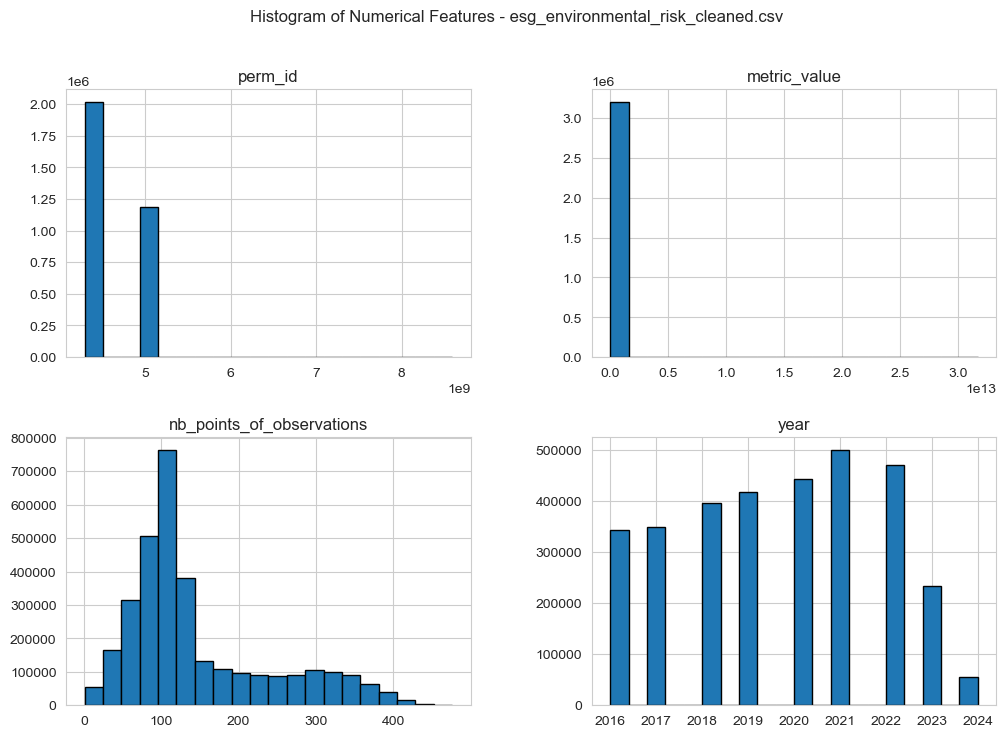


 Generating visualizations for: esg_environmental_opportunity_cleaned.csv


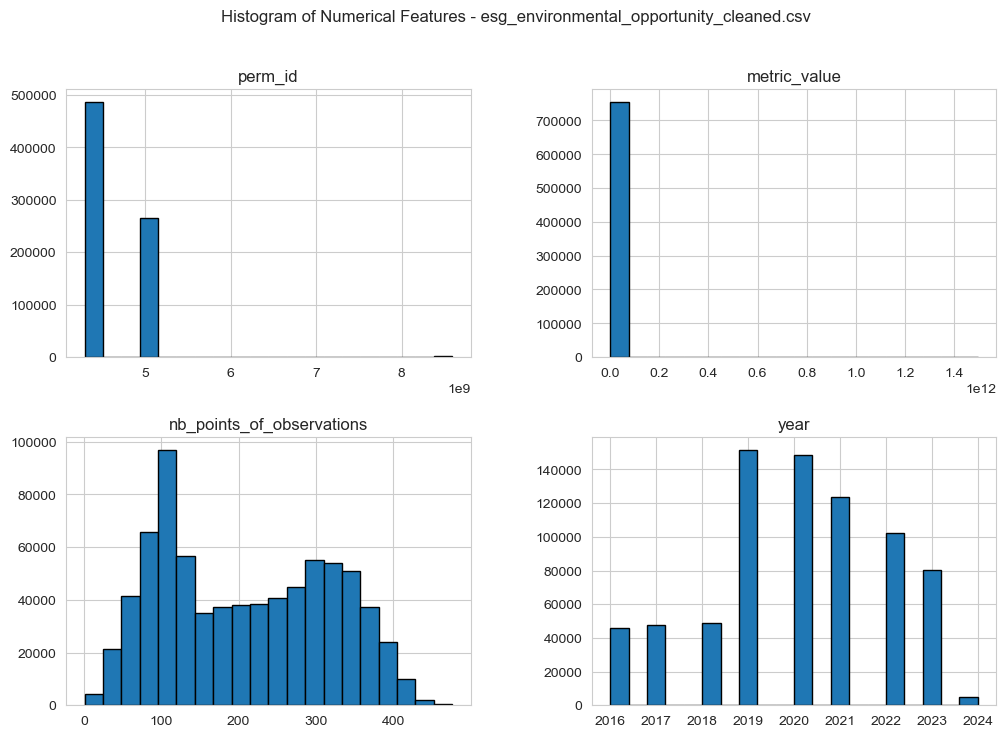


 Generating visualizations for: esg_social_risk_cleaned.csv


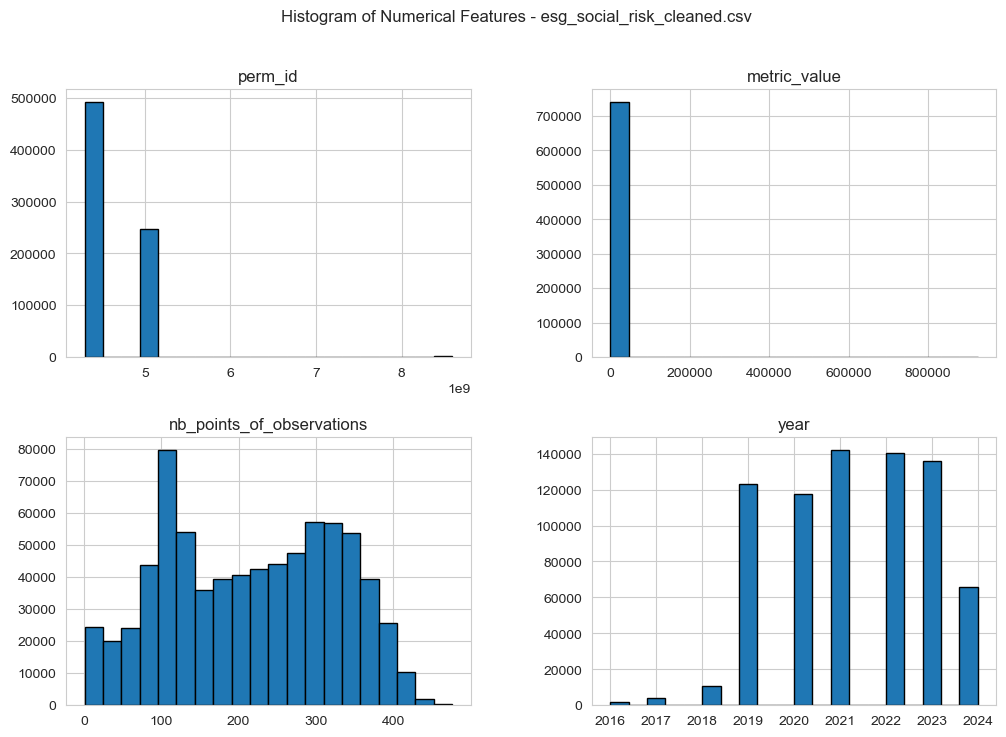


 Generating visualizations for: esg_social_opportunity_cleaned.csv


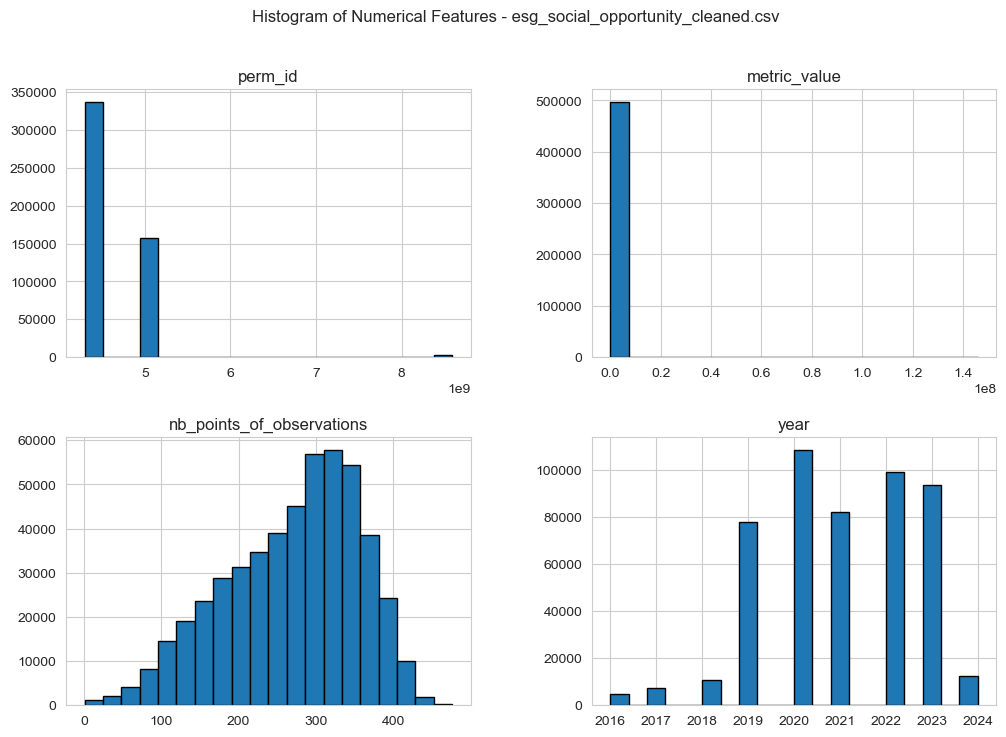


 Generating visualizations for: esg_governance_risk_cleaned.csv


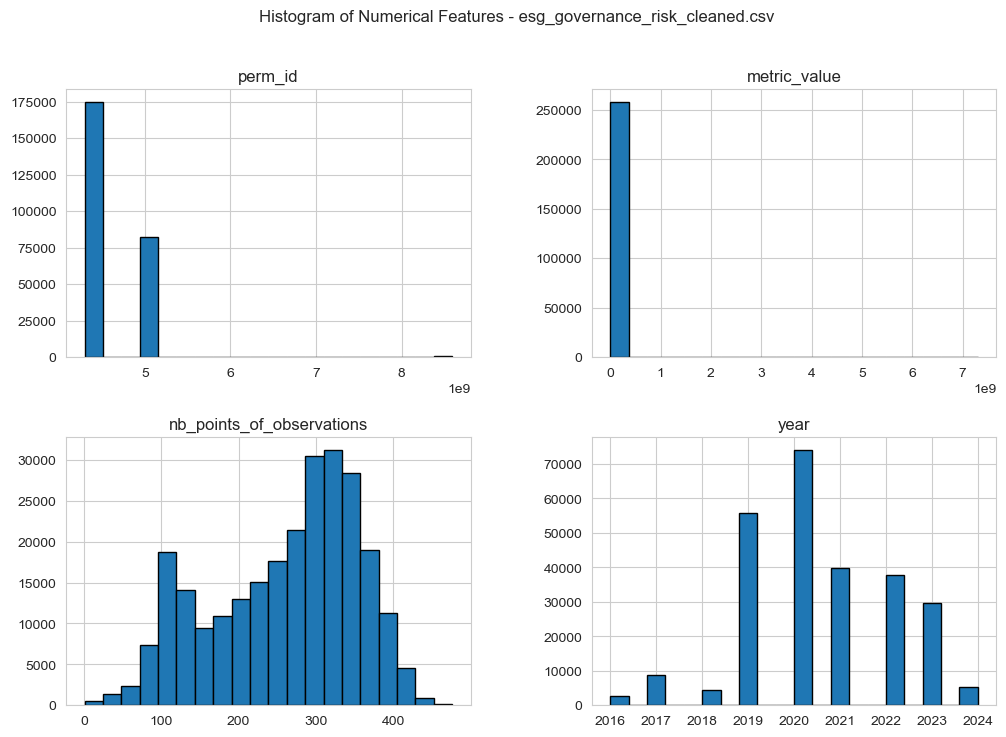


 Generating visualizations for: esg_governance_opportunity_cleaned.csv


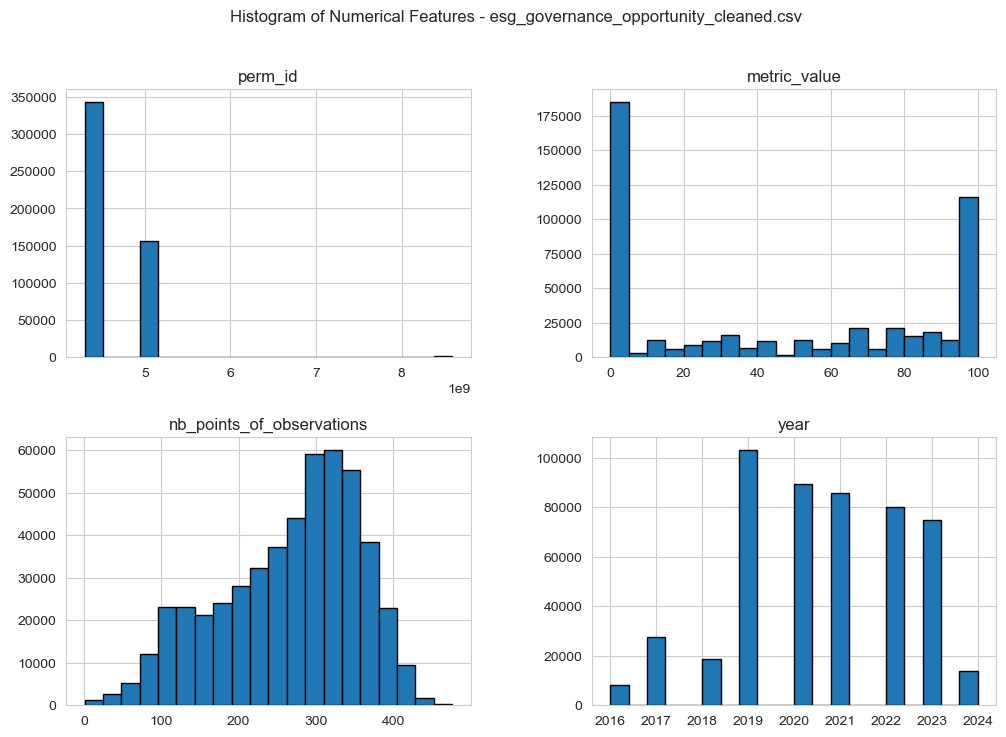


 Visualization process complete for all files!


In [17]:
# Loop through each file and generate visualizations
# Set visual style
sns.set_style("whitegrid")

for filename in cleaned_files:
    file_path = os.path.join(processed_folder_path, filename)

    # Load the dataset
    df = pd.read_csv(file_path, delimiter='|', encoding='utf-8')

    print(f"\n Generating visualizations for: {filename}")

    # Identify numerical and categorical columns
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    # Histogram for numerical columns
    if len(num_cols) > 0:
        df[num_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
        plt.suptitle(f"Histogram of Numerical Features - {filename}")
        plt.show()

print("\n Visualization process complete for all files!")

## Distribution of Metric Names in ESG Cleaned Datasets

This cell iterates over each cleaned ESG dataset and visualizes the distribution of `metric_name`, which represents the individual ESG metrics reported across companies.

### Key Steps:
- Loads each dataset from the list of cleaned ESG files.
- Checks for the presence of the `metric_name` column.
- Plots a horizontal bar chart showing the top 20 most frequent metric names for that dataset.

### Chart Characteristics:
- Bar charts use Seaborn for clean styling and better readability.
- Only the top 20 categories are shown to prevent clutter and ensure legibility.
- The y-axis represents distinct metric names; the x-axis represents the count of their occurrences.

These visualizations provide insight into the concentration and diversity of reported ESG metrics within each ESG subcategory file. This is essential for assessing metric redundancy, sparsity, or imbalance before feature selection or PCA.


 Generating visualizations for: esg_environmental_risk_cleaned.csv


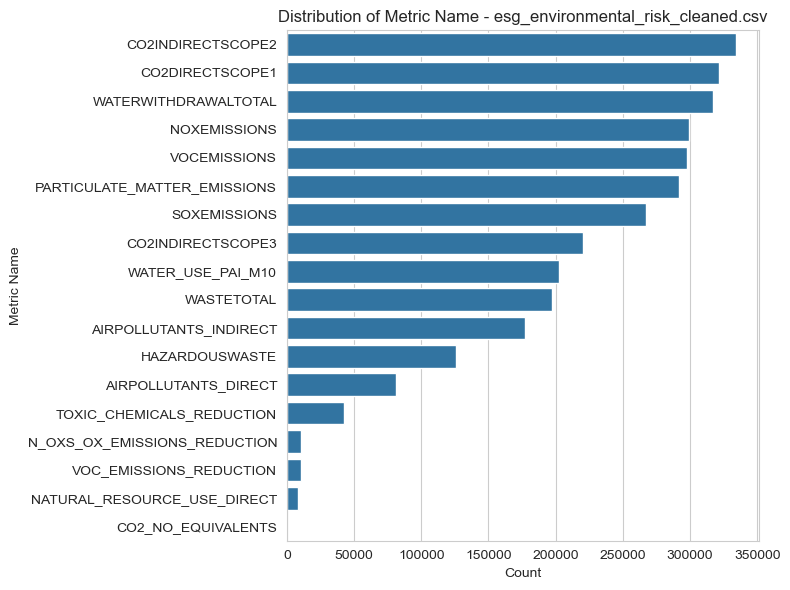


 Generating visualizations for: esg_environmental_opportunity_cleaned.csv


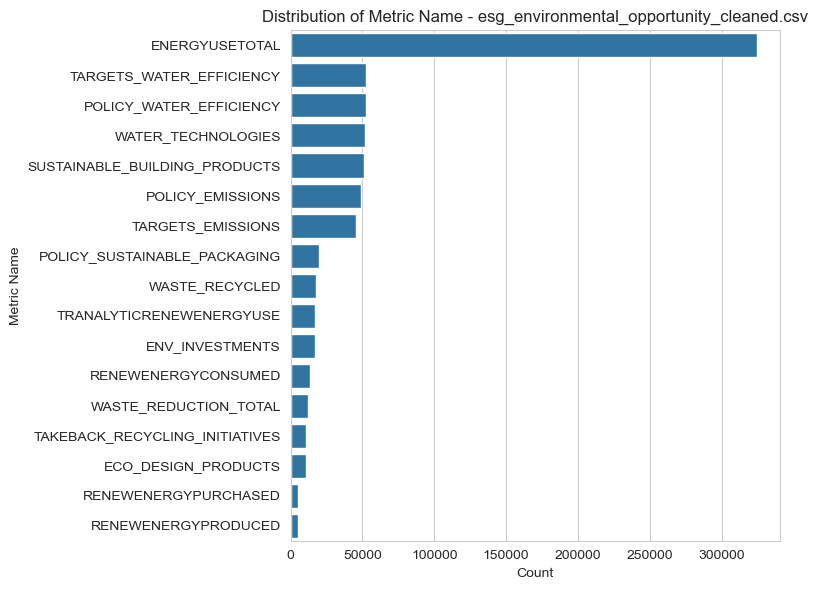


 Generating visualizations for: esg_social_risk_cleaned.csv


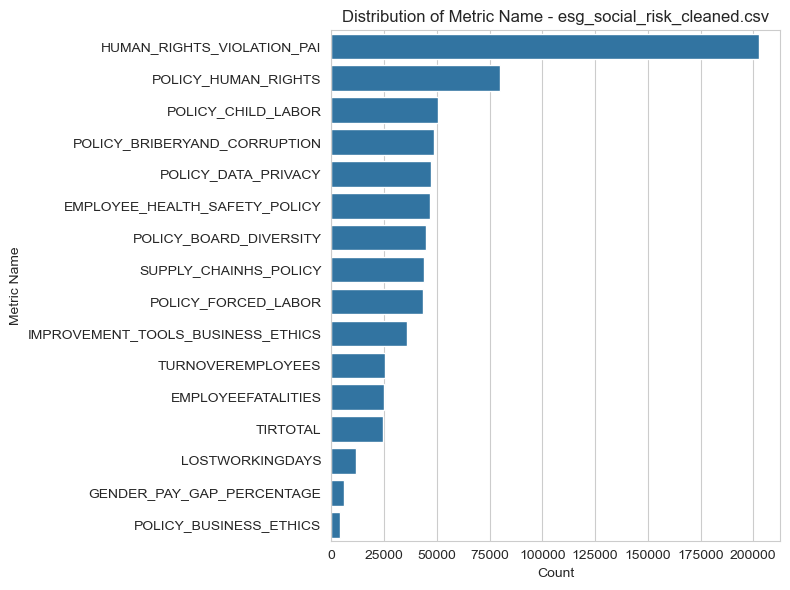


 Generating visualizations for: esg_social_opportunity_cleaned.csv


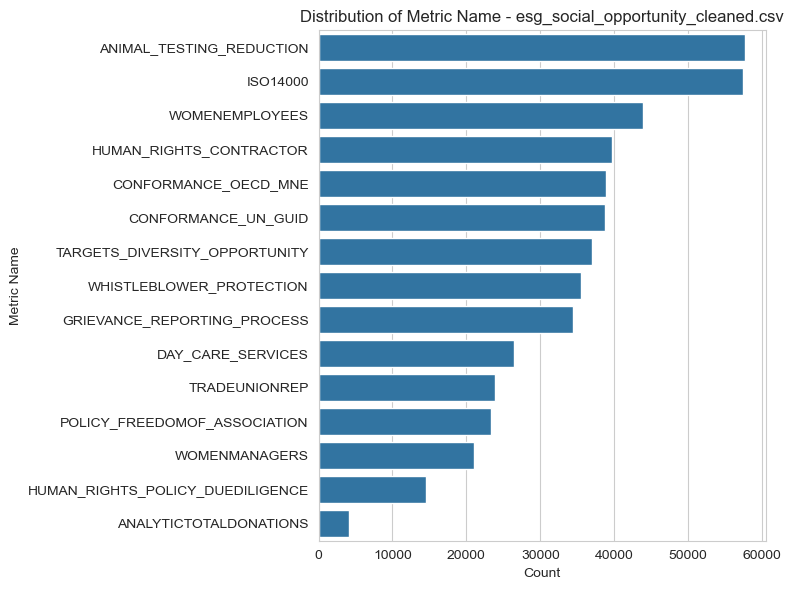


 Generating visualizations for: esg_governance_risk_cleaned.csv


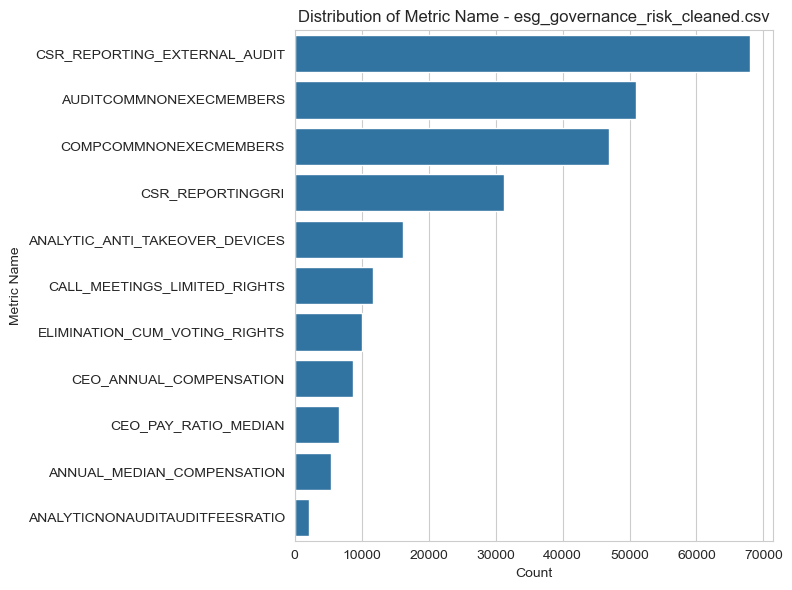


 Generating visualizations for: esg_governance_opportunity_cleaned.csv


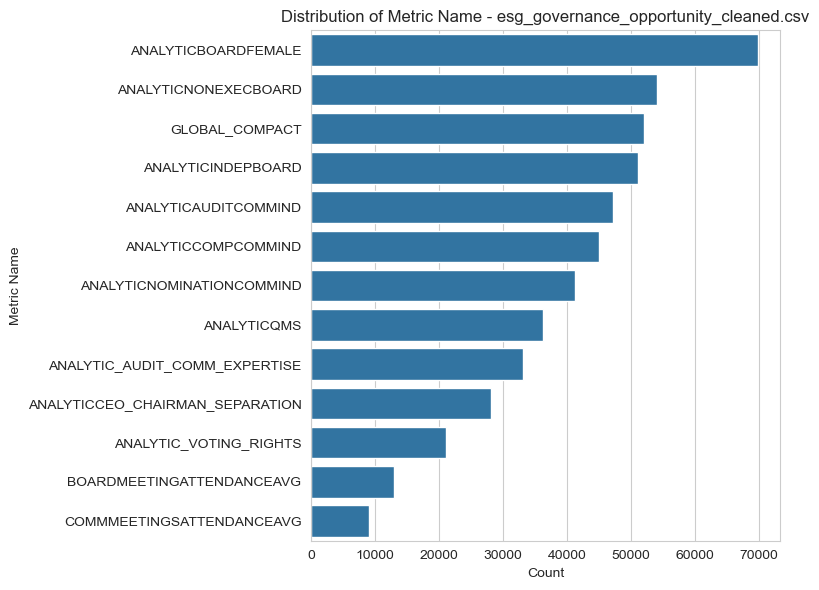


 Visualization process complete for all files!


In [18]:
	
target_column = "metric_name" 

# Loop through each file and generate visualizations
for filename in cleaned_files:
    file_path = os.path.join(processed_folder_path, filename)

    # Load the dataset
    df = pd.read_csv(file_path, delimiter='|', encoding='utf-8')

    print(f"\n Generating visualizations for: {filename}")

    # Check if the target column exists
    if target_column in df.columns:
        plt.figure(figsize=(8, 6))

        # Display only the top 20 categories for better readability
        top_categories = df[target_column].value_counts().nlargest(20)

        sns.barplot(y=top_categories.index, x=top_categories.values, orient='h')

        plt.xlabel("Count")
        plt.ylabel(target_column.replace("_", " ").title())  # Format column name
        plt.title(f"Distribution of {target_column.replace('_', ' ').title()} - {filename}")
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"'{target_column}' column not found in {filename}")

print("\n Visualization process complete for all files!")

## Industry Distribution in ESG Cleaned Datasets

This cell generates horizontal bar plots showing the distribution of companies by industry within each ESG subcategory dataset.

### Objectives:
- Visualize the spread and representation of different industries across:
  - Environmental Risk & Opportunity
  - Social Risk & Opportunity
  - Governance Risk & Opportunity

### Method:
- Loads each cleaned ESG dataset from the processed folder.
- Checks if the `Industry` column exists.
- Plots the top 20 most common industries by occurrence count in the dataset.
- Uses Seaborn horizontal bar charts for clarity.

These visualizations help identify which industries are over- or under-represented in the dataset, which is crucial for:
- Industry-specific PCA modeling
- Bias detection
- Disclosure coverage analysis


 Generating visualizations for: esg_environmental_risk_cleaned.csv


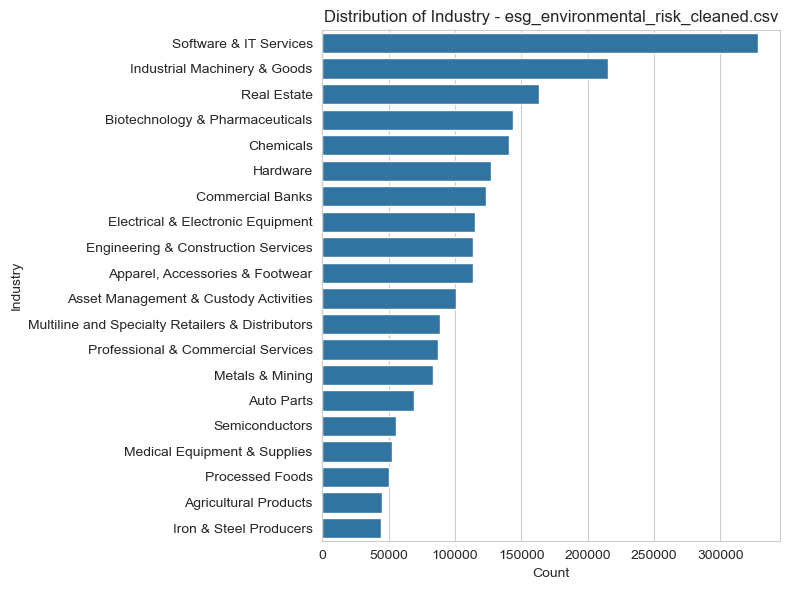


 Generating visualizations for: esg_environmental_opportunity_cleaned.csv


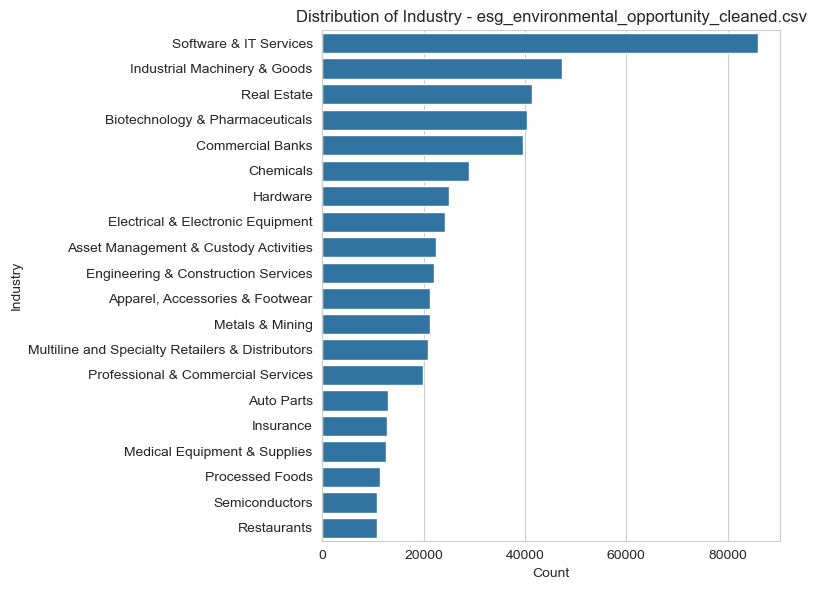


 Generating visualizations for: esg_social_risk_cleaned.csv


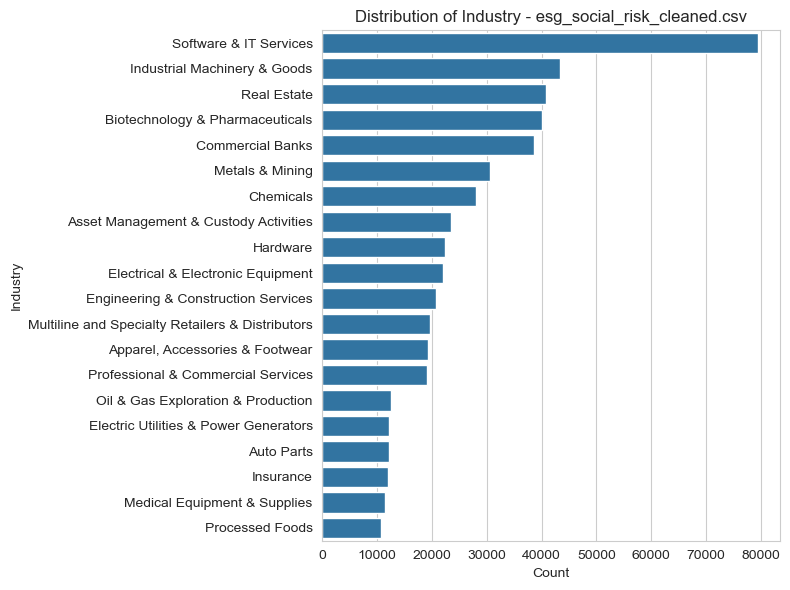


 Generating visualizations for: esg_social_opportunity_cleaned.csv


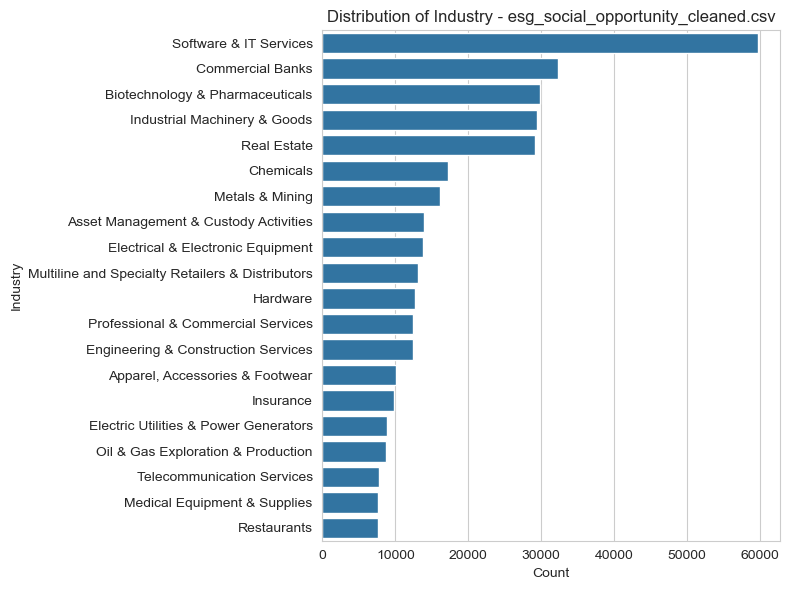


 Generating visualizations for: esg_governance_risk_cleaned.csv


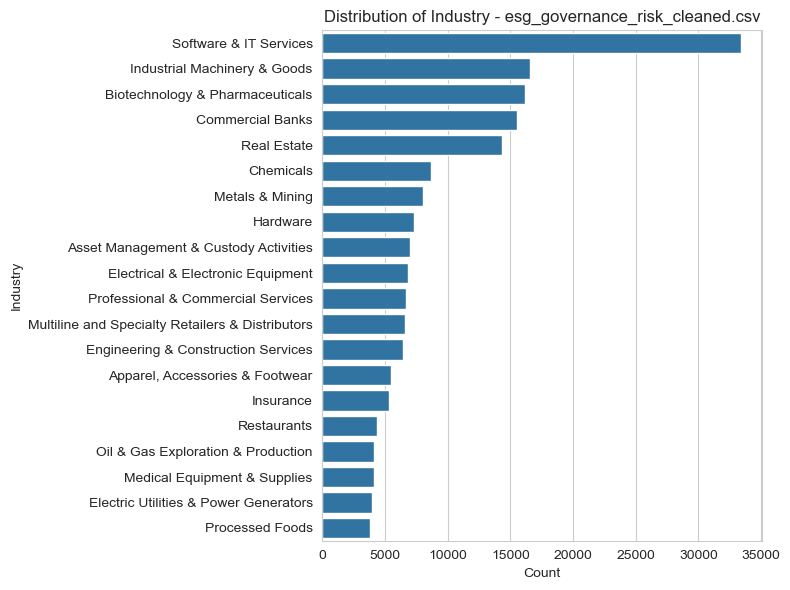


 Generating visualizations for: esg_governance_opportunity_cleaned.csv


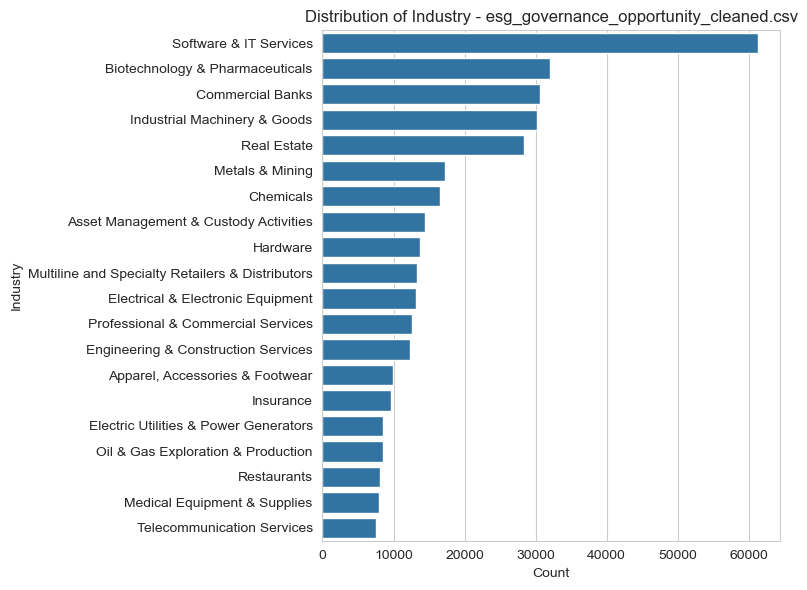


 Visualization process complete for all files!


In [ ]:
target_column = "Industry" 

# Loop through each file and generate visualizations
for filename in cleaned_files:
    file_path = os.path.join(processed_folder_path, filename)

    # Load the dataset
    df = pd.read_csv(file_path, delimiter='|', encoding='utf-8')

    print(f"\n Generating visualizations for: {filename}")

    # Check if the target column exists
    if target_column in df.columns:
        plt.figure(figsize=(8, 6))

        # Display only the top 20 categories for better readability
        top_categories = df[target_column].value_counts().nlargest(20)

        sns.barplot(y=top_categories.index, x=top_categories.values, orient='h')

        plt.xlabel("Count")
        plt.ylabel(target_column.replace("_", " ").title())  # Format column name
        plt.title(f"Distribution of {target_column.replace('_', ' ').title()} - {filename}")
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"'{target_column}' column not found in {filename}")

print("\n Visualization process complete for all files!")

## Filter ESG Datasets by Industry

This function, `filter_by_industry`, enables selective filtering of ESG datasets to retain only those rows that belong to specified industries. It helps isolate industry-specific subsets for more targeted PCA modeling and analysis.

### Function: `filter_by_industry(file_list, industries, save_path)`

**Parameters**:
- `file_list`: List of cleaned ESG filenames to process.
- `industries`: List of industry names to retain (e.g., `["Semiconductors", "Biotechnology & Pharmaceuticals"]`).
- `save_path`: Directory where the filtered output files will be saved.

### Process:
1. Iterates through each file in `file_list`.
2. Loads the CSV using `|` as the delimiter.
3. Filters the rows where the `Industry` column matches one of the specified industries.
4. Saves the filtered dataset to the same directory with `_industry.csv` appended to the filename.

This prepares ESG subcategory data for industry-specific PCA workflows aligned with SASB disclosure standards.

In [19]:
def filter_by_industry(file_list, industries, save_path):
    """Filters the given ESG files for selected industries and saves them."""
    for filename in file_list:
        file_path = os.path.join(save_path, filename)

        # Load dataset
        df = pd.read_csv(file_path, delimiter='|', encoding='utf-8')

        # Filter dataset
        df_filtered = df[df["Industry"].isin(industries)]

        # Save filtered dataset
        new_filename = filename.replace(".csv", "_industry.csv")
        df_filtered.to_csv(os.path.join(save_path, new_filename), index=False, sep='|')

        print(f" Saved: {new_filename} with {df_filtered.shape[0]} rows")


In [20]:
# # Industries to focus on
selected_industries = ["Semiconductors", "Biotechnology & Pharmaceuticals"]
filter_by_industry(cleaned_files, selected_industries, processed_folder_path)
print("\n Industry-specific ESG files have been successfully created!")


 Saved: esg_environmental_risk_cleaned_industry.csv with 199425 rows
 Saved: esg_environmental_opportunity_cleaned_industry.csv with 51207 rows
 Saved: esg_social_risk_cleaned_industry.csv with 50603 rows
 Saved: esg_social_opportunity_cleaned_industry.csv with 35987 rows
 Saved: esg_governance_risk_cleaned_industry.csv with 19569 rows
 Saved: esg_governance_opportunity_cleaned_industry.csv with 38592 rows

 Industry-specific ESG files have been successfully created!


## Load Filtered Industry-Specific ESG Datasets

This cell performs the loading of all ESG subcategory datasets that were previously filtered by selected industries (e.g., Semiconductors, Biotechnology & Pharmaceuticals).

### Process:
- Constructs the filenames by appending `_industry.csv` to the original cleaned filenames.
- Reads each filtered file using the pipe (`|`) delimiter.
- Stores each DataFrame in a dictionary `industry_data`, with the filename as the key.

This structure allows efficient programmatic access to industry-filtered datasets, supporting downstream tasks such as normalization, PCA transformation, and comparative visualizations.

In [21]:
# Industry-specific cleaned files
industry_files = [filename.replace(".csv", "_industry.csv") for filename in cleaned_files]

# Load data into a dictionary
industry_data = {
    filename: pd.read_csv(os.path.join(processed_folder_path, filename), delimiter='|', encoding='utf-8')
    for filename in industry_files
}
print("\nIndustry-specific data loaded successfully!")



Industry-specific data loaded successfully!


## Plot Top 10 Companies Reporting ESG Metrics

This visualization function, `plot_top_companies`, displays the most active companies (based on count of ESG data points) across each industry-filtered ESG dataset.

### Key Steps:
- Iterates over the industry-filtered datasets stored in `industry_data`.
- Uses `value_counts()` on the `company_name` column to identify the top 10 reporters.
- Generates a horizontal bar chart for each file showing the number of ESG metrics reported per company.

### Use Case:
This view is useful for:
- Identifying highly active ESG reporters.
- Ensuring sufficient company-level coverage for PCA.
- Spot-checking imbalances in company representation across industries.

Each chart is labeled using the corresponding filename, indicating the ESG category and dimension (e.g., risk/opportunity).

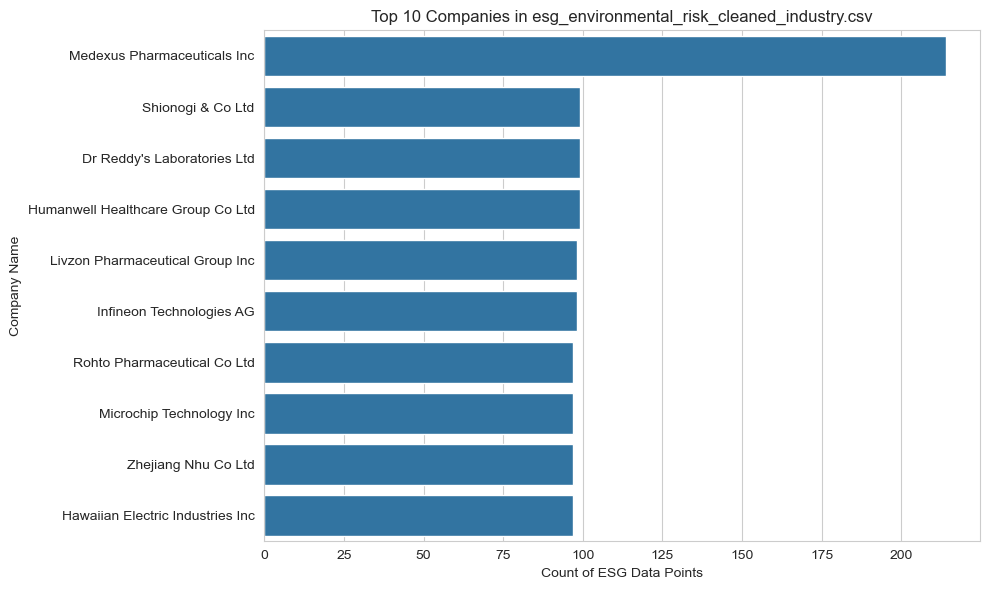

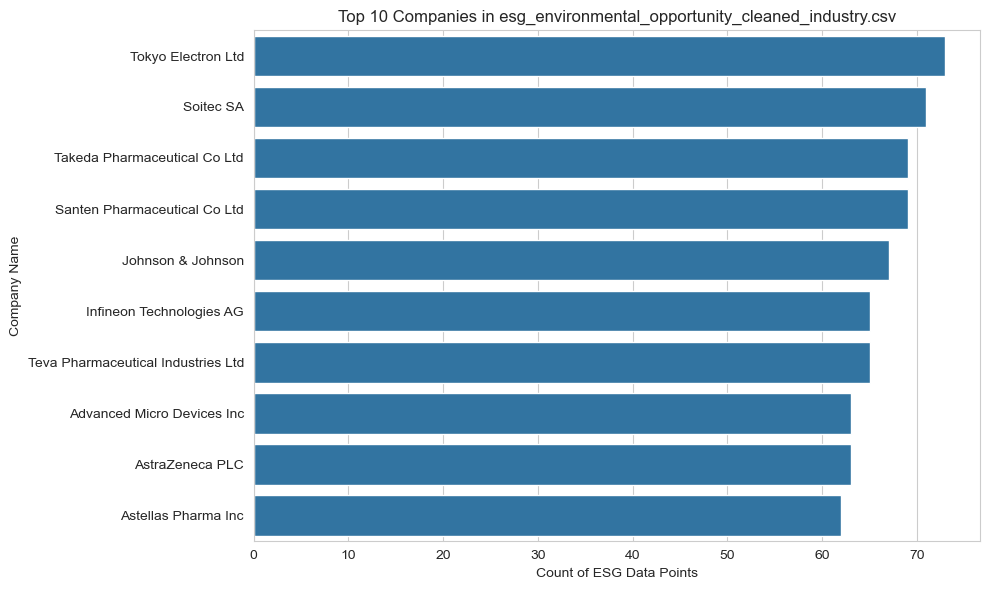

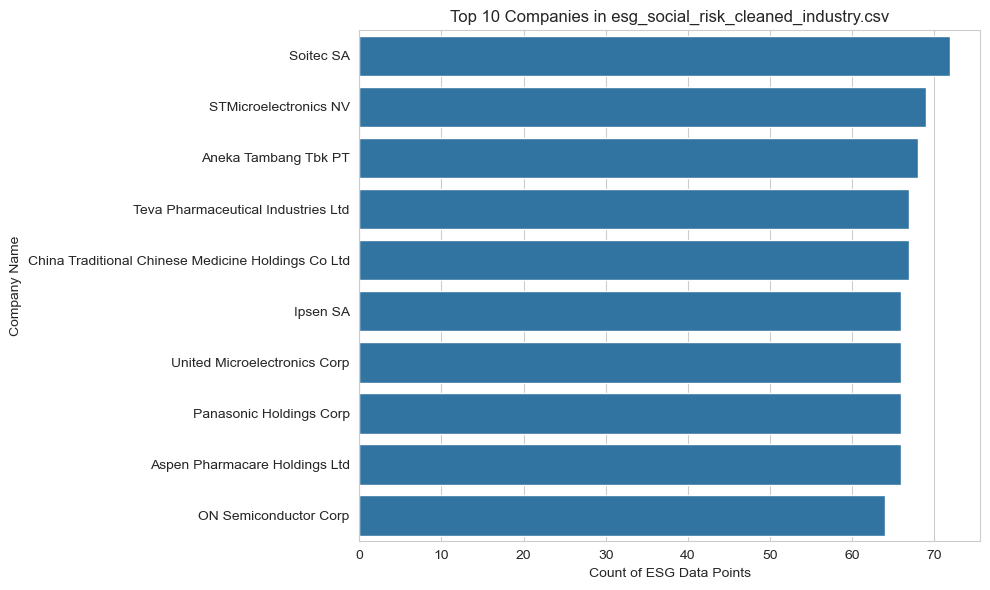

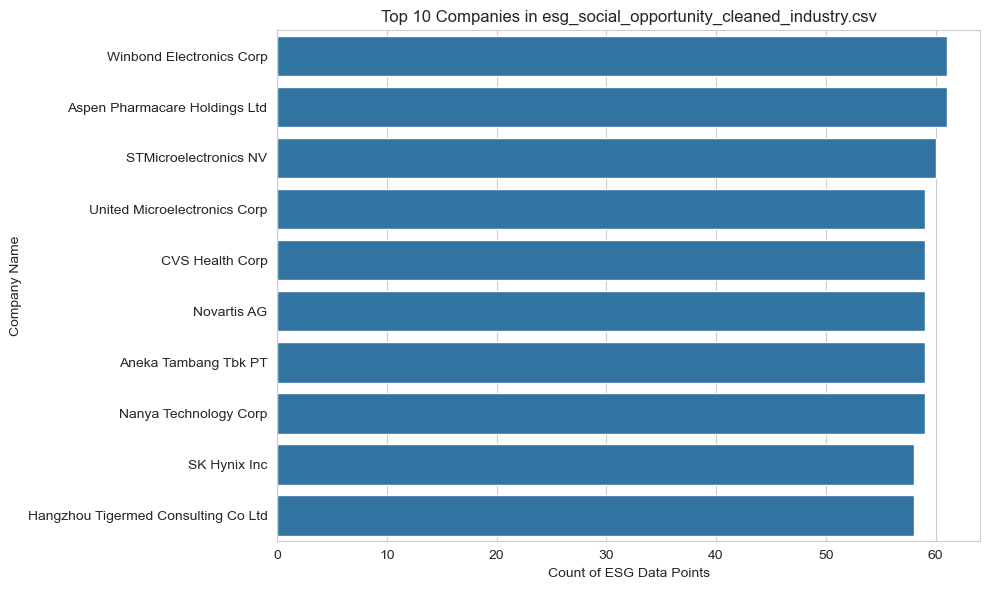

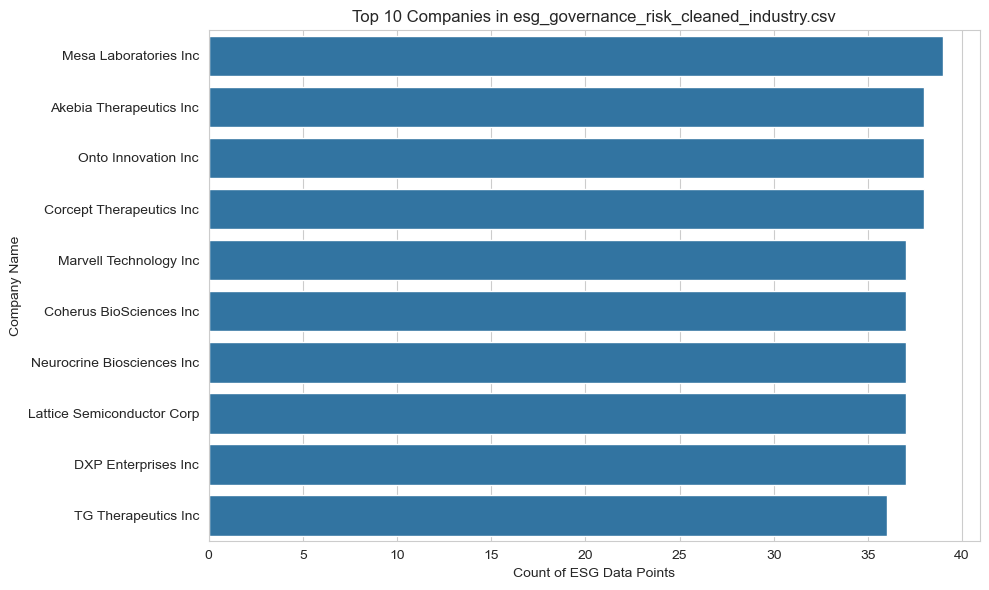

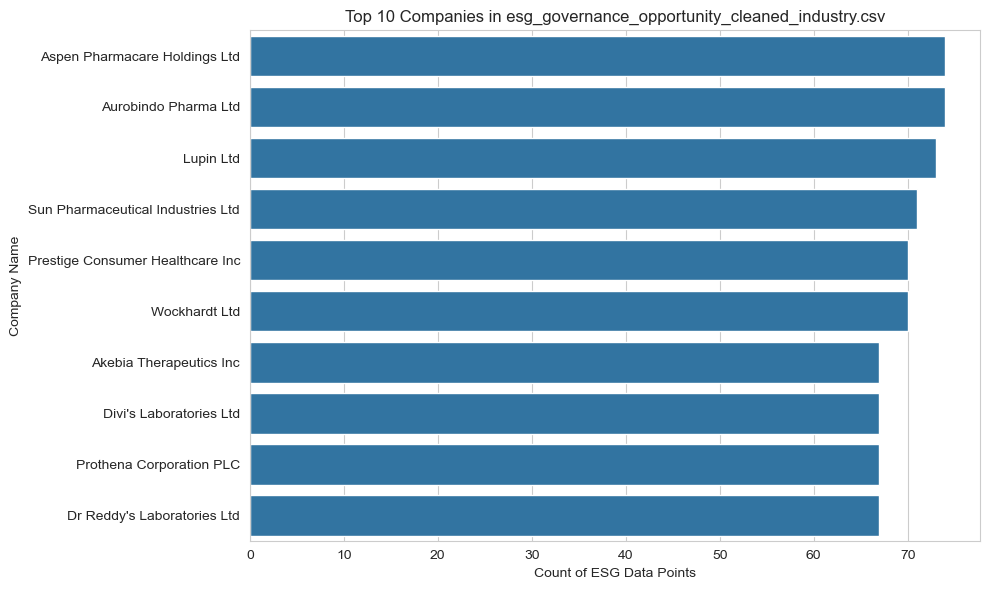

In [23]:
def plot_top_companies(data_dict):
    """Plots the top 10 companies reporting ESG metrics."""
    for filename, df in data_dict.items():
        top_companies = df["company_name"].value_counts().head(10)

        plt.figure(figsize=(10, 6))
        sns.barplot(y=top_companies.index, x=top_companies.values,hue=None)
        plt.xlabel("Count of ESG Data Points")
        plt.ylabel("Company Name")
        plt.title(f"Top 10 Companies in {filename}")
        plt.tight_layout()
        plt.show()

plot_top_companies(industry_data)


## Function: `plot_esg_metrics(data, title_suffix)`

This function generates a detailed set of exploratory visualizations for a given ESG dataset (e.g., environmental risk, social opportunity), designed to support downstream modeling and interpretation. It consists of four key analytical views:

### 1. Top Companies by Reporting Volume
- Displays the top 10 companies by count of ESG metric submissions.
- A horizontal bar chart shows the concentration of reporting activity.

### 2. Most Frequently Reported Metrics
- Highlights the 10 most commonly reported ESG metrics.
- Useful for detecting over-represented or dominant metrics within a category.

### 3. Outlier Detection by Industry
- Uses a boxplot to visualize metric value distributions across industries.
- Shows variations in ESG reporting behavior and identifies outliers.

### 4. Correlation Heatmap of Metric Trends
- Constructs a pivot table (`year` × `metric_name`) with average values.
- Computes the pairwise Pearson correlation of metrics.
- Plots a heatmap to show clusters of positively or negatively correlated metrics.

This function supports multi-layered insight into ESG data behavior—company reporting intensity, metric importance, distribution anomalies, and inter-metric relationships—all in a single unified workflow.

In [25]:
def plot_esg_metrics(data, title_suffix):
    """Analyzes and visualizes ESG metrics trends for Risk and Opportunity separately."""
    
    if data.empty:
        print(f" No data available for {title_suffix}.")
        return

    # Step 1: Distribution of ESG Metrics per Company
    if "company_name" in data.columns:
        top_companies = data["company_name"].value_counts().head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(y=top_companies.index, x=top_companies.values, hue=None, legend=False)
        plt.xlabel("Number of ESG Reports", fontsize=12)
        plt.ylabel("Company Name", fontsize=12)
        plt.title(f"Top 10 Companies Reporting {title_suffix} Metrics", fontsize=14, fontweight="bold")
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis="x", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    # Step 2: Variability of ESG Metrics
    if "metric_name" in data.columns:
        top_metrics = data["metric_name"].value_counts().head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(y=top_metrics.index, x=top_metrics.values, hue=None, legend=False)
        plt.xlabel("Count of ESG Reports", fontsize=12)
        plt.ylabel("Metric Name", fontsize=12)
        plt.title(f"Top 10 Reported {title_suffix} Metrics", fontsize=14, fontweight="bold")
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis="x", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    # Step 3: Outlier Analysis
    if "Industry" in data.columns and "metric_value" in data.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=data, x="Industry", y="metric_value", showfliers=True)
        plt.xlabel("Industry", fontsize=12)
        plt.ylabel("Metric Value", fontsize=12)
        plt.title(f"Outlier Detection in {title_suffix} Metrics", fontsize=14, fontweight="bold")
        plt.xticks(rotation=30, fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    # Step 4: Correlation Heatmap (Filtered for Readability)
    if "year" in data.columns and "metric_value" in data.columns:
        pivot_data = data.pivot_table(index="year", columns="metric_name", values="metric_value", aggfunc="mean")

        # Compute correlation, dropping NA values
        corr_data = pivot_data.corr().dropna(axis=0, how='all').dropna(axis=1, how='all')

        plt.figure(figsize=(14, 8))
        sns.heatmap(
            corr_data, cmap="coolwarm", annot=False, linewidths=0.5, center=0,
            cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1
        )
        plt.title(f"Correlation Heatmap of {title_suffix} Metrics", fontsize=14, fontweight="bold")
        plt.xticks(rotation=45, ha="right", fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
        plt.grid(False)
        plt.tight_layout()
        plt.show()

## Load and Preprocess ESG Data by Category and Industry

This cell loads cleaned and industry-filtered ESG datasets for each of the six main categories and applies additional filtering and type corrections.

### Files Loaded:
- Environmental: Risk and Opportunity
- Social: Risk and Opportunity
- Governance: Risk and Opportunity

Each file is expected to have been previously cleaned and filtered by industry, with filenames suffixed by `_cleaned_industry.csv`.

### Post-loading Processing:
- Filters the rows to retain only companies in the `selected_industries` list (e.g., "Semiconductors", "Biotechnology & Pharmaceuticals").
- Converts the `year` column to numeric format to support time-series grouping and plotting.
- Drops rows with missing `metric_value` and coerces `metric_value` into numeric format.

This preprocessing ensures consistency in the schema and value types across ESG categories, preparing the data for normalization, aggregation, and PCA.

In [29]:

df_env_risk = pd.read_csv(os.path.join(processed_folder_path, industry_cleaned_files["env_risk"]), delimiter='|', encoding='utf-8')
df_env_opportunity = pd.read_csv(os.path.join(processed_folder_path, industry_cleaned_files["env_opportunity"]), delimiter='|', encoding='utf-8')
df_soc_risk = pd.read_csv(os.path.join(processed_folder_path, industry_cleaned_files["soc_risk"]), delimiter='|', encoding='utf-8')
df_soc_opportunity = pd.read_csv(os.path.join(processed_folder_path, industry_cleaned_files["soc_opportunity"]), delimiter='|', encoding='utf-8')
df_gov_risk = pd.read_csv(os.path.join(processed_folder_path, industry_cleaned_files["gov_risk"]), delimiter='|', encoding='utf-8')
df_gov_opportunity = pd.read_csv(os.path.join(processed_folder_path, industry_cleaned_files["gov_opportunity"]), delimiter='|', encoding='utf-8')

# Optional: Store them in a dictionary for uniform processing
esg_dataframes = {
    "env_risk": df_env_risk,
    "env_opportunity": df_env_opportunity,
    "soc_risk": df_soc_risk,
    "soc_opportunity": df_soc_opportunity,
    "gov_risk": df_gov_risk,
    "gov_opportunity": df_gov_opportunity
}

# Preprocess all dataframes (filter industries, parse year, clean metric_value)
for key in esg_dataframes:
    df = esg_dataframes[key]
    df = df[df["Industry"].isin(selected_industries)].copy()
    df["year"] = pd.to_numeric(df["year"], errors='coerce')
    df.dropna(subset=["metric_value"], inplace=True)
    df["metric_value"] = pd.to_numeric(df["metric_value"], errors='coerce')
    esg_dataframes[key] = df  # Update after transformation



Analyzing Environmental Risk Metrics...


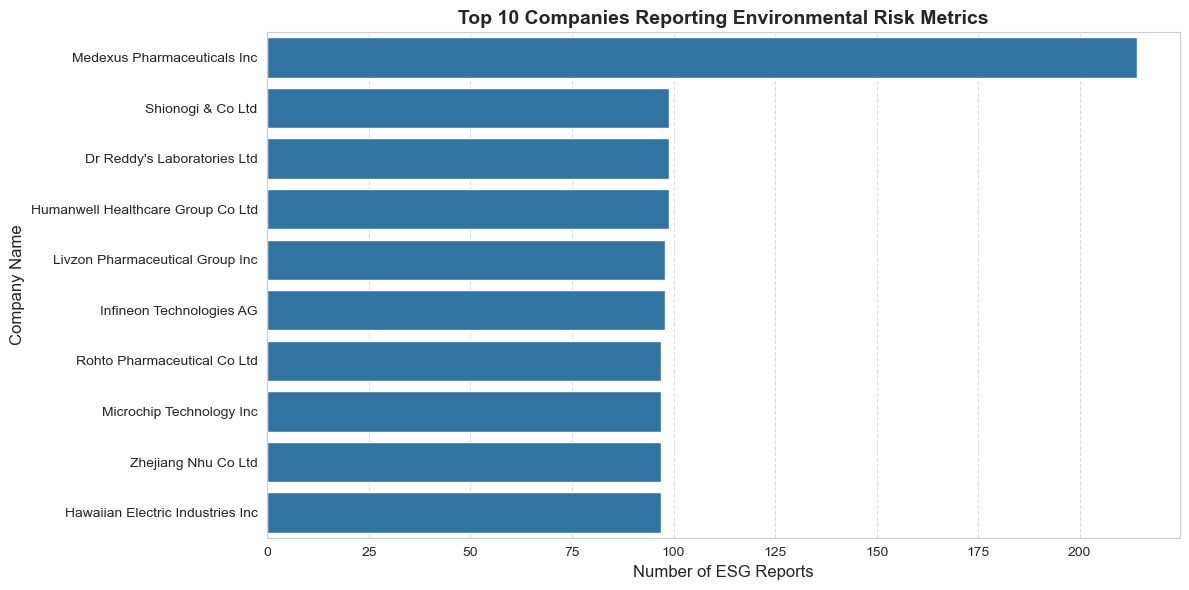

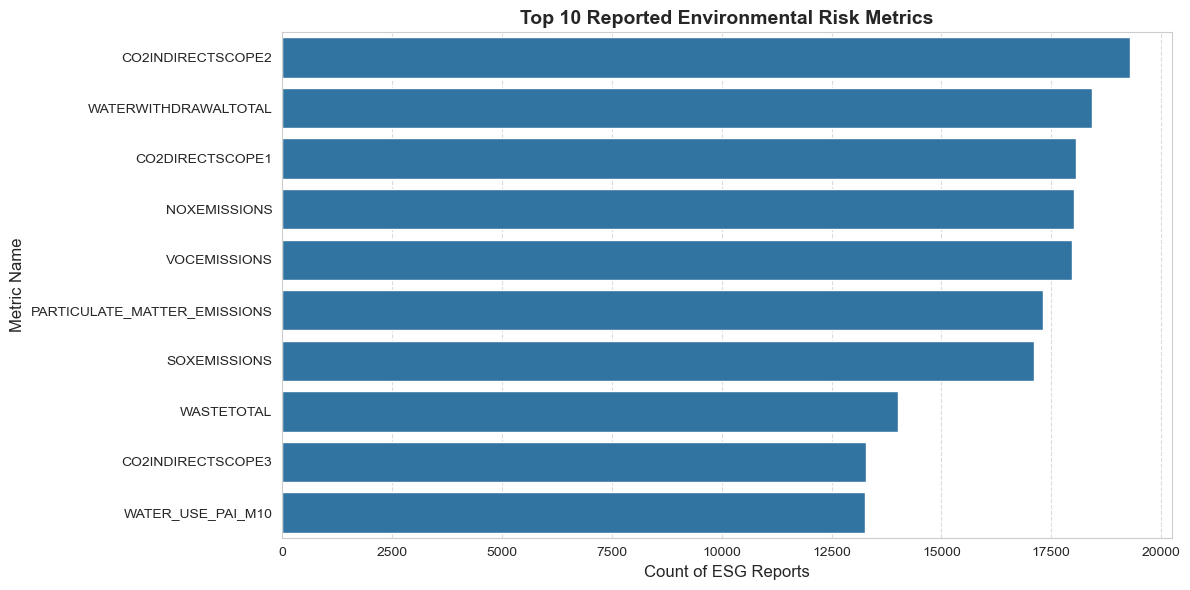

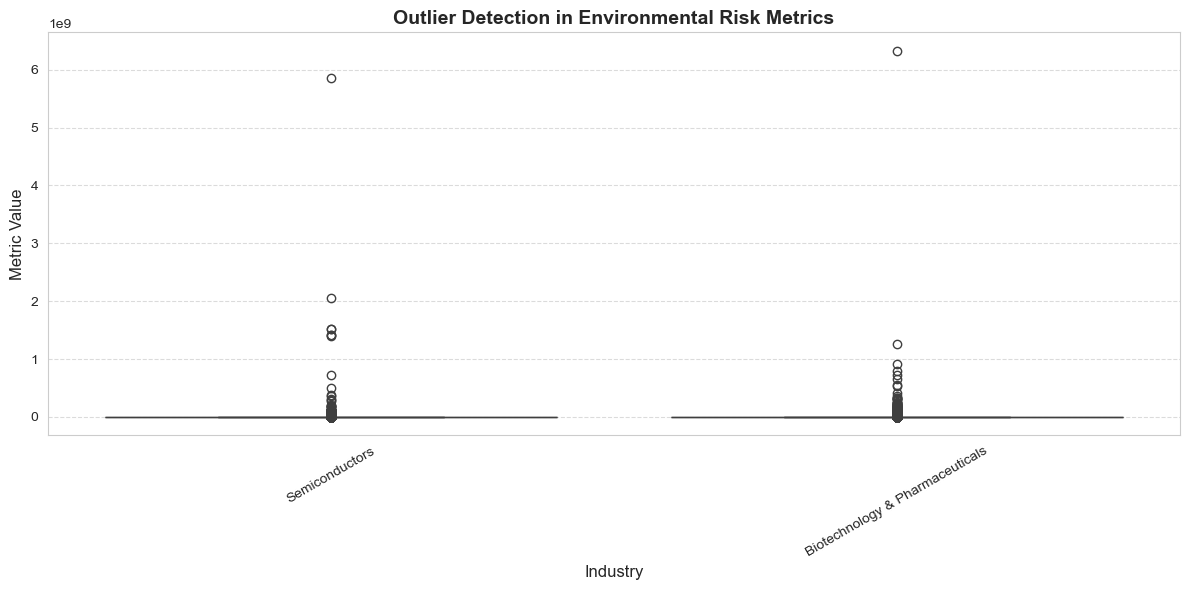

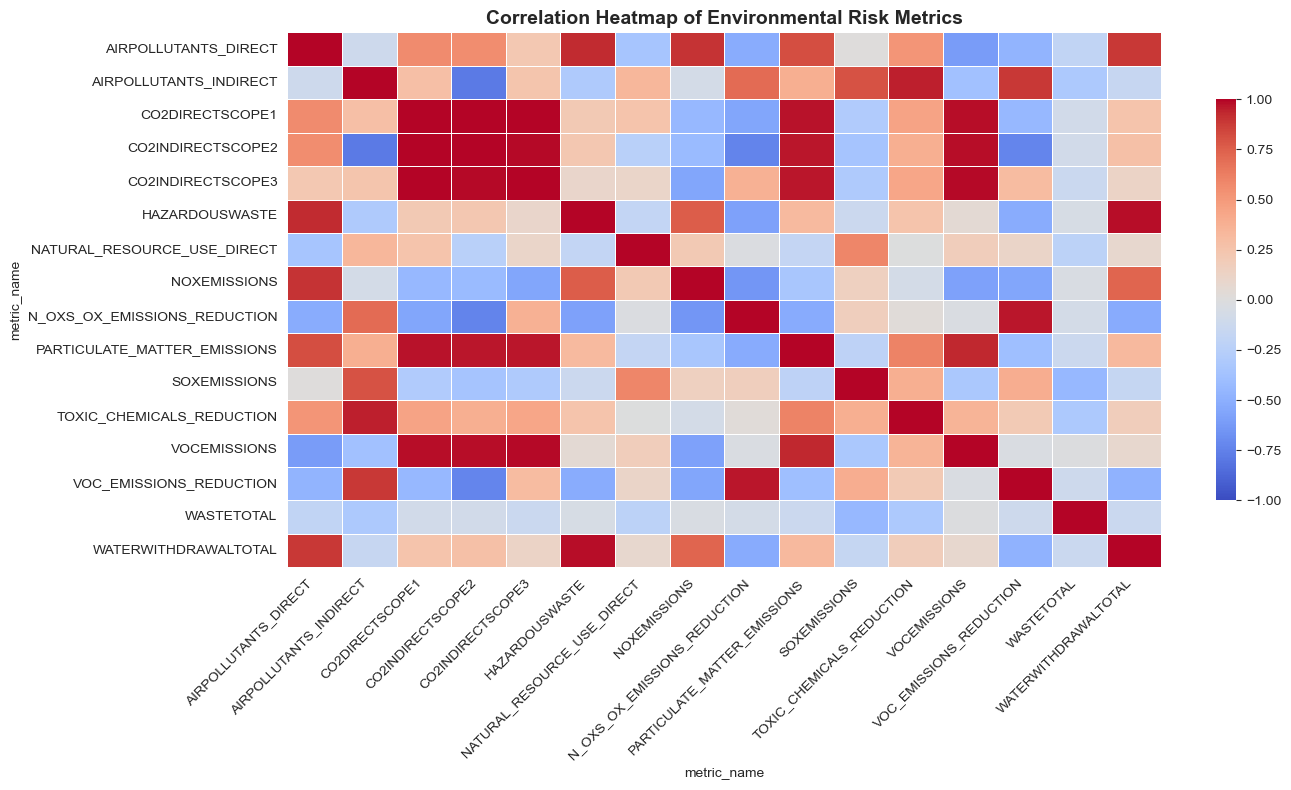


Analyzing Environmental Opportunity Metrics...


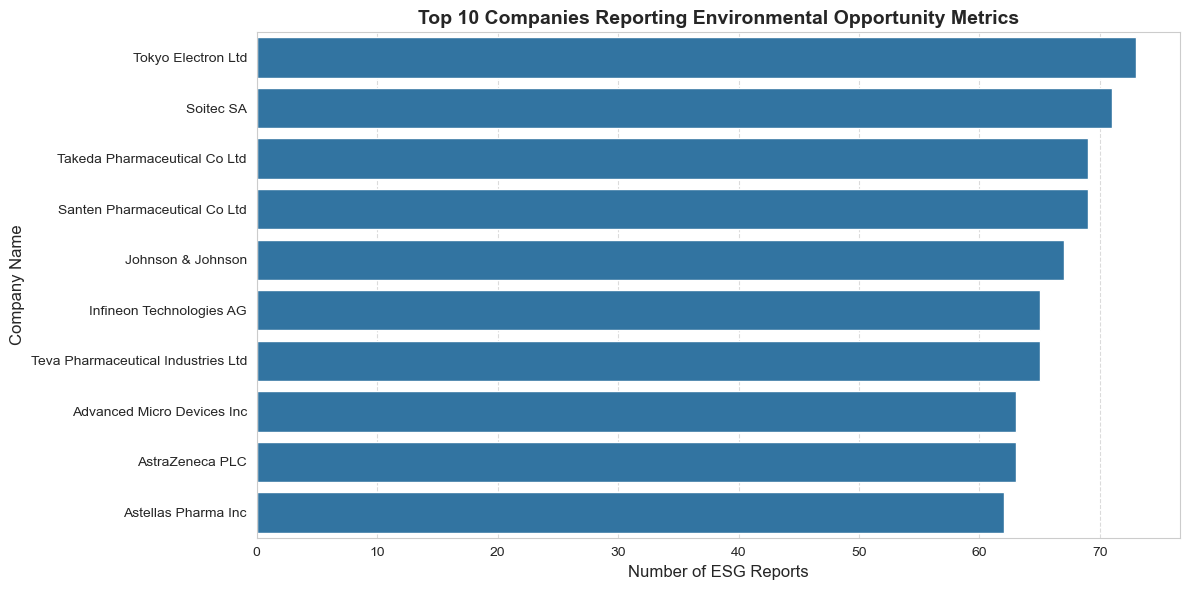

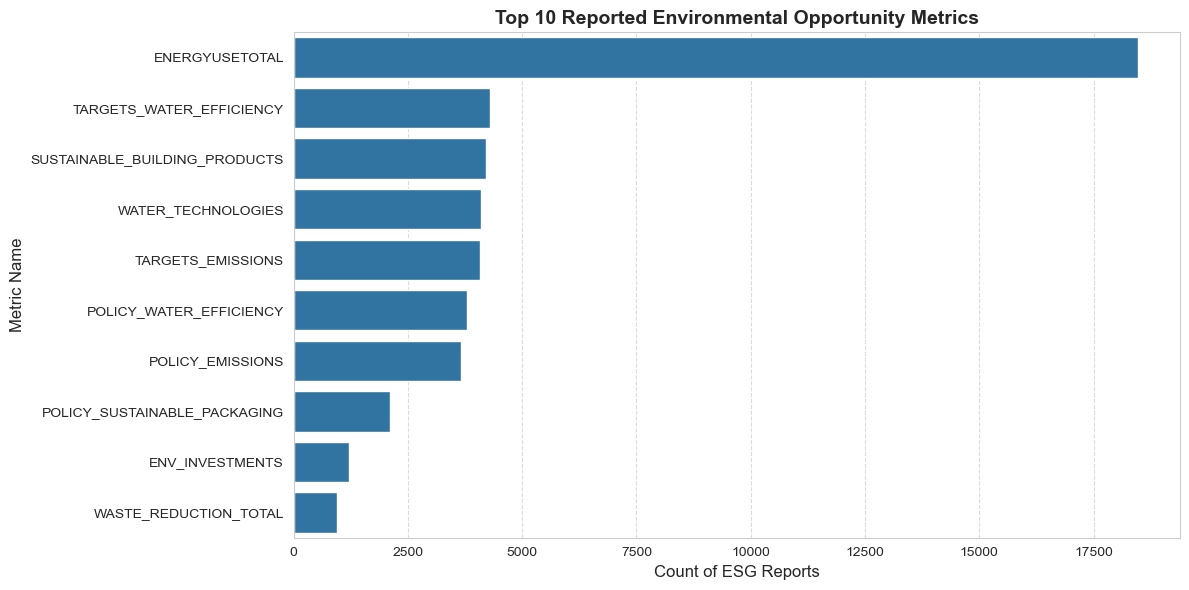

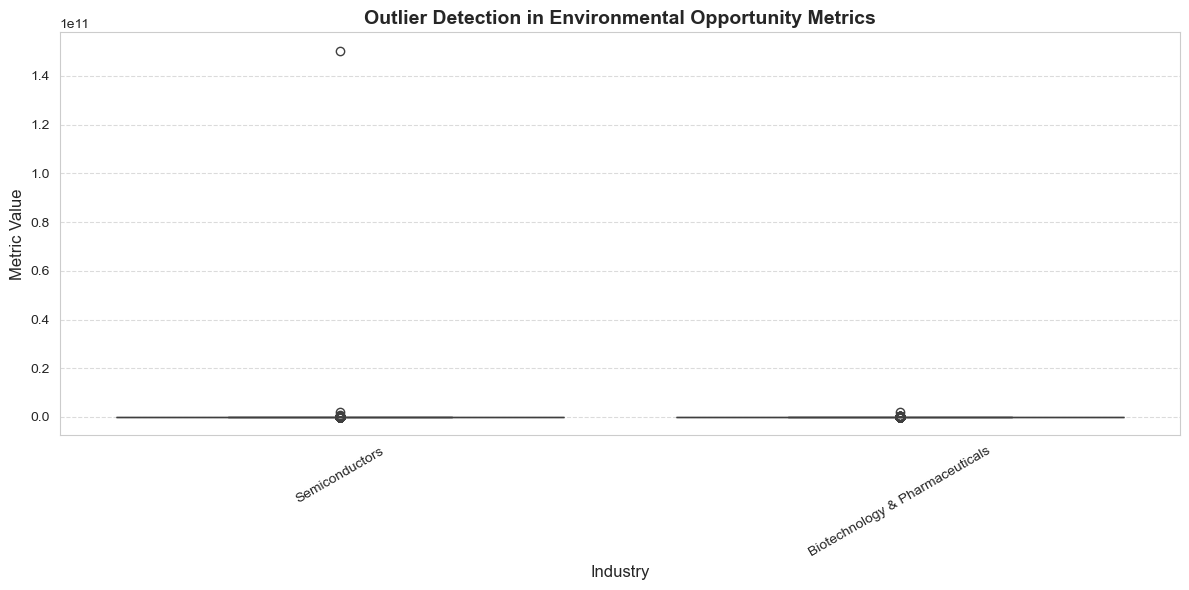

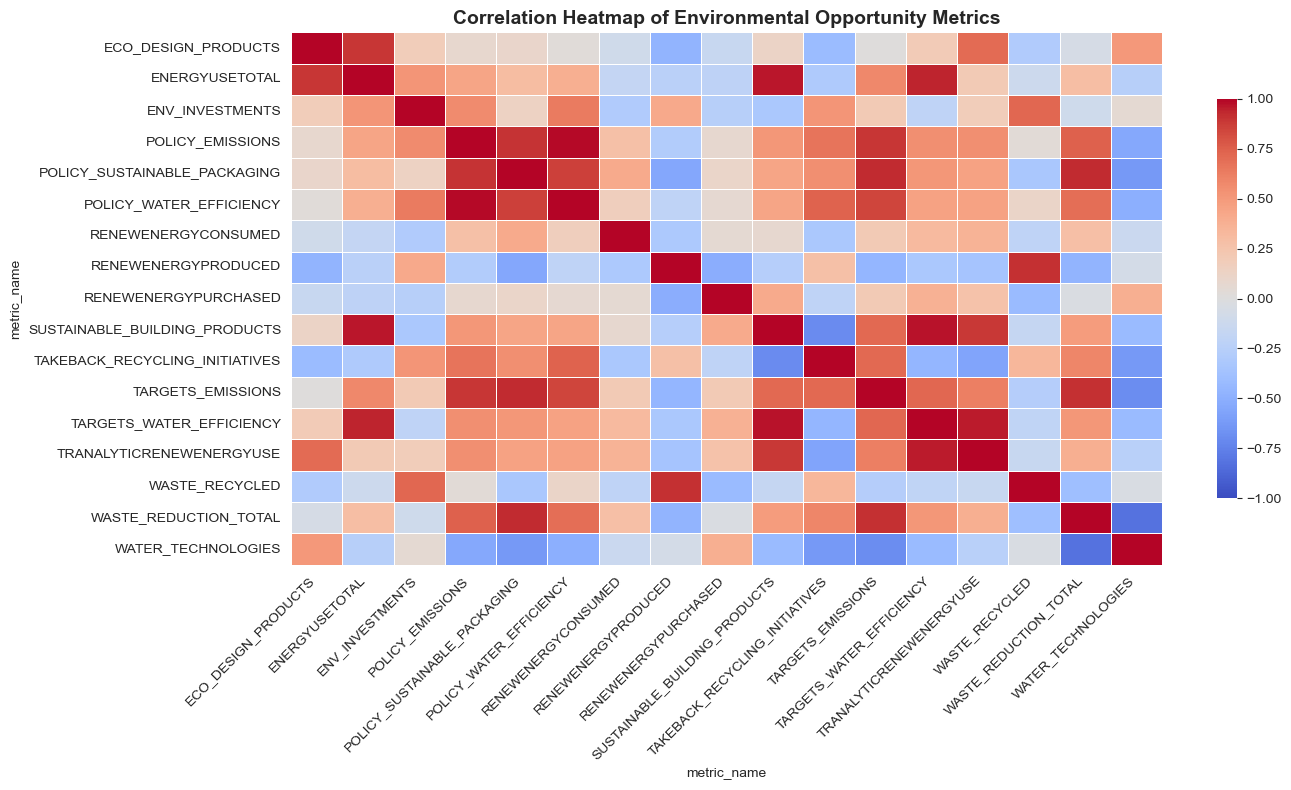


Analyzing Social Risk Metrics...


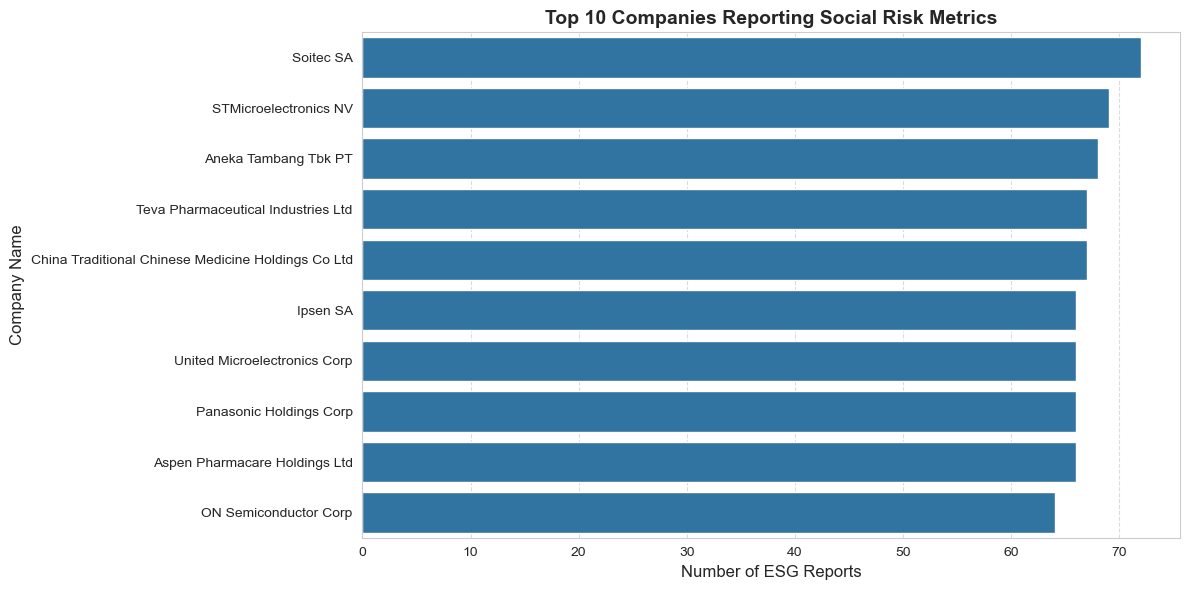

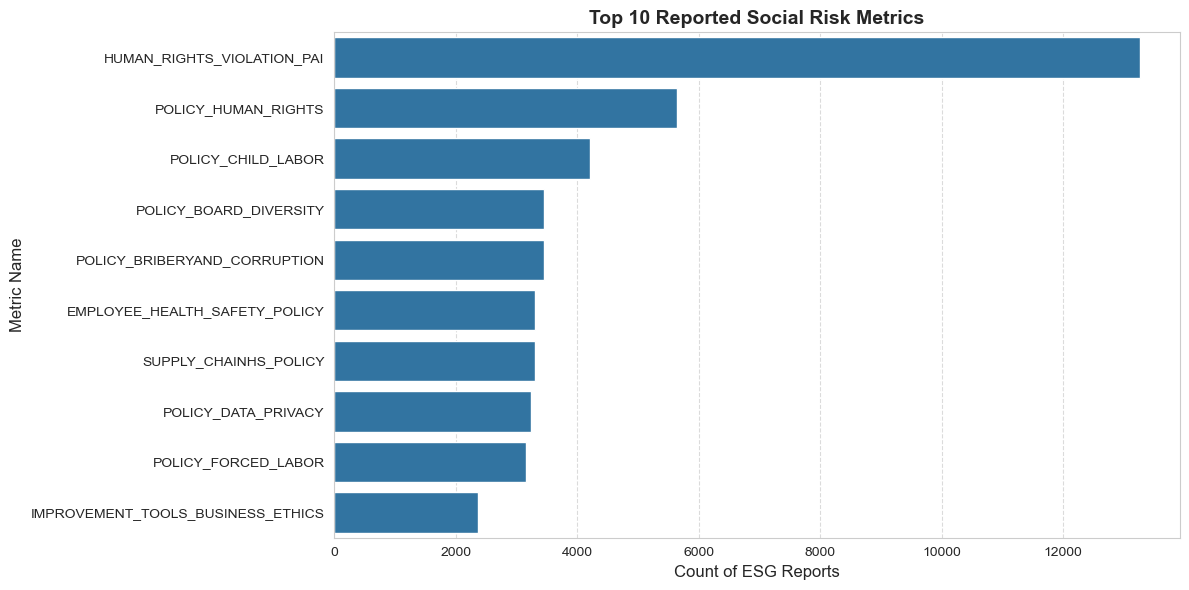

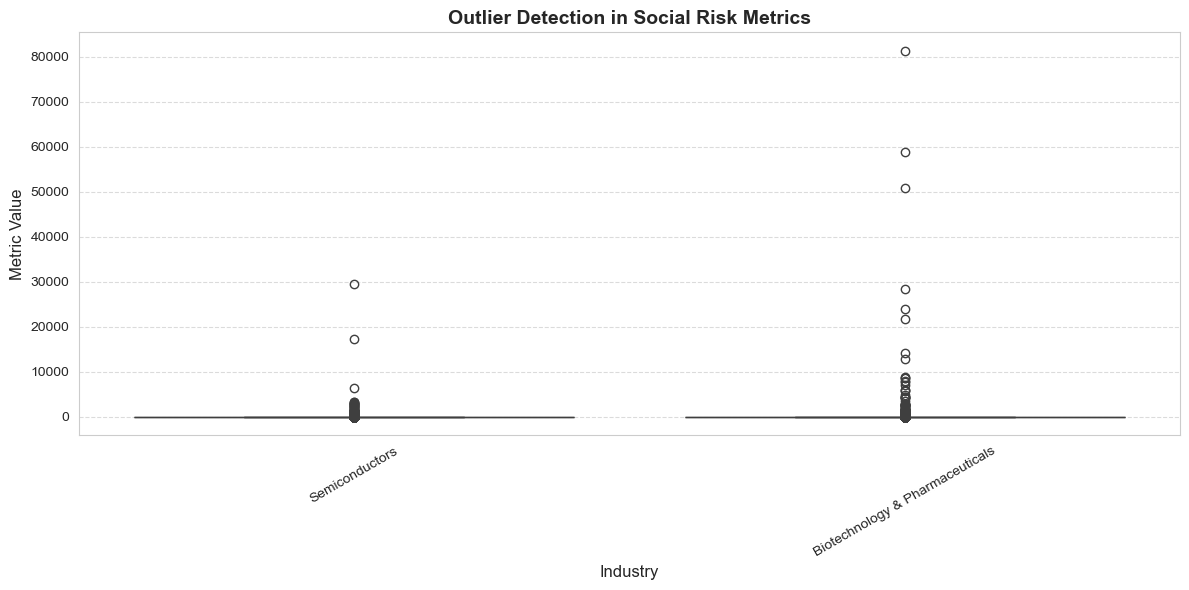

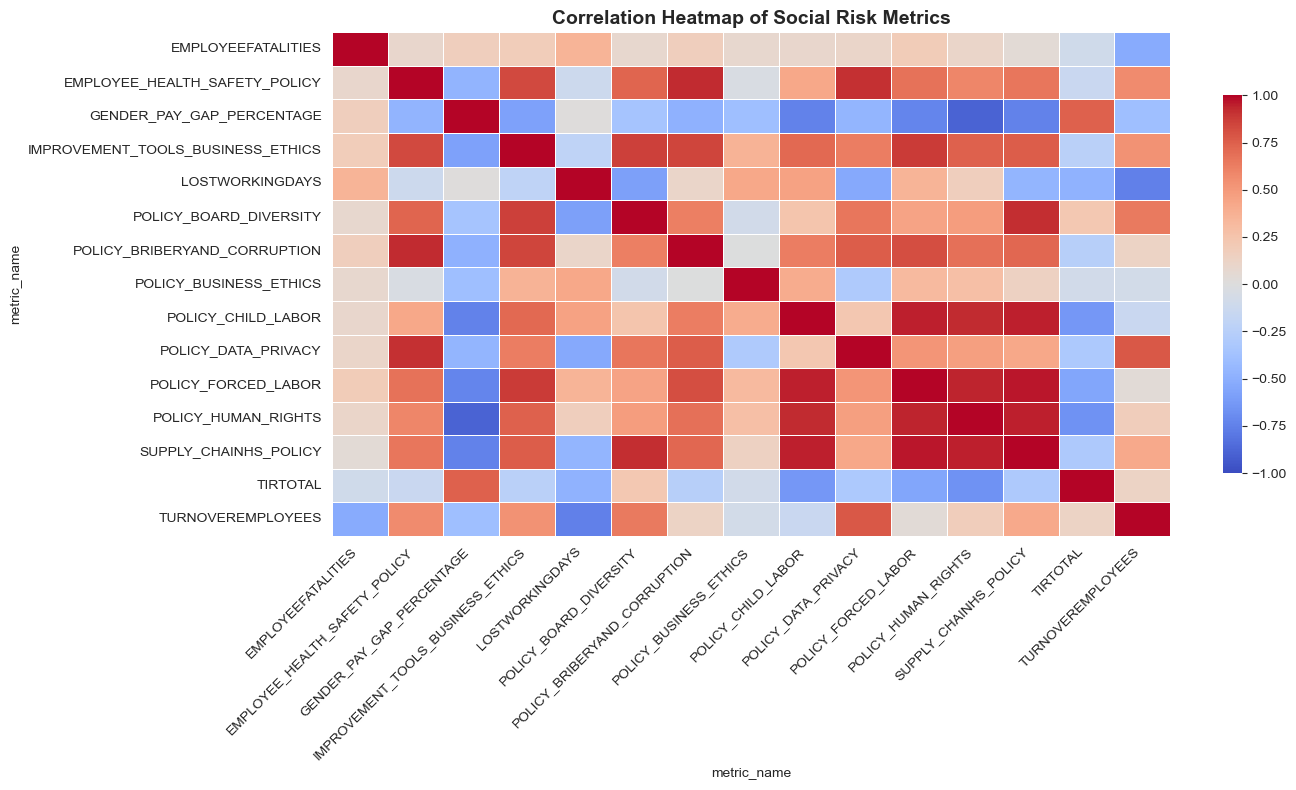


Analyzing Social Opportunity Metrics...


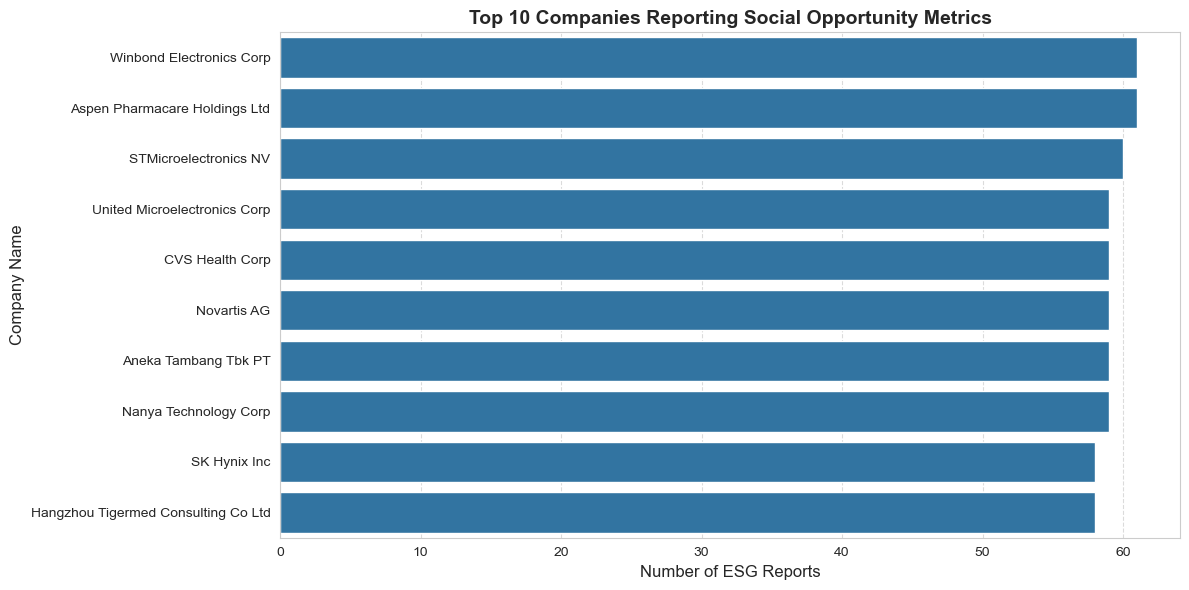

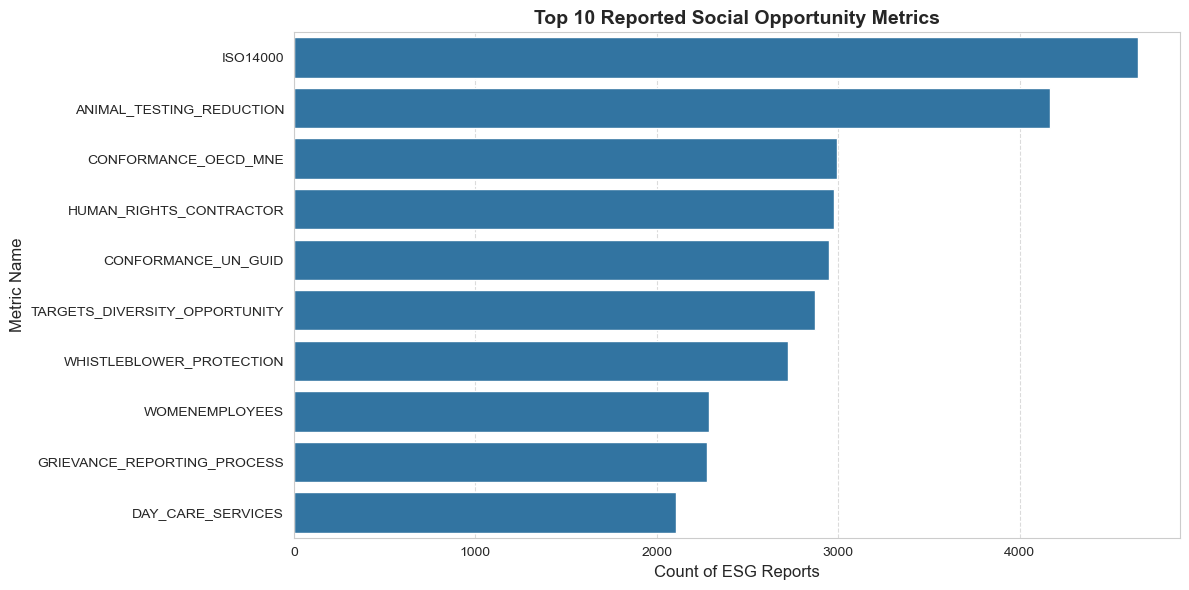

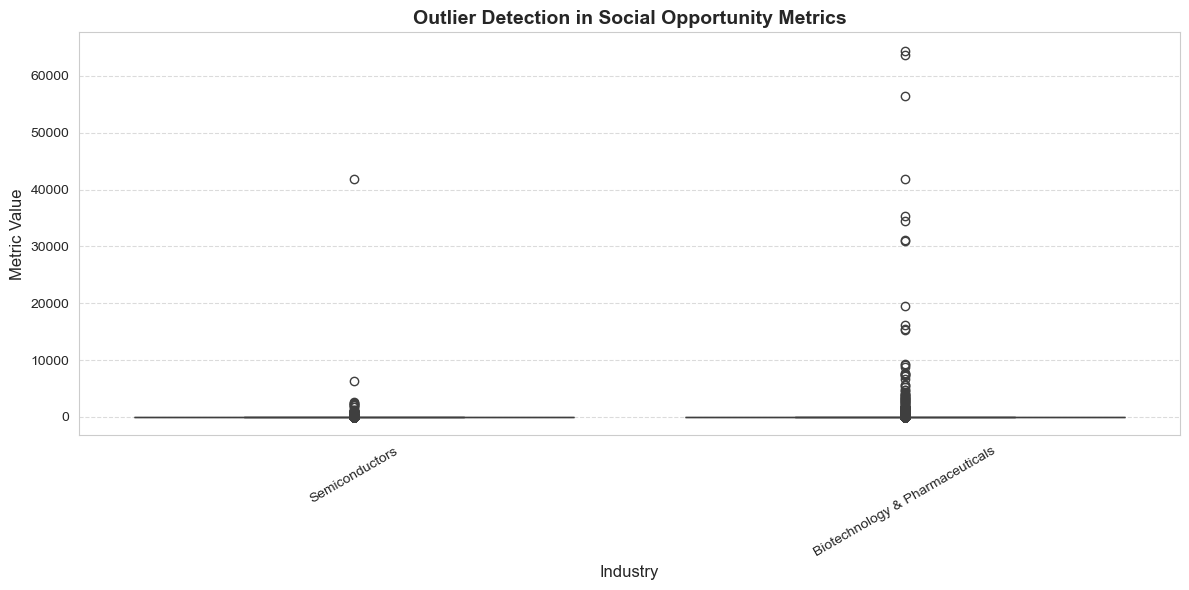

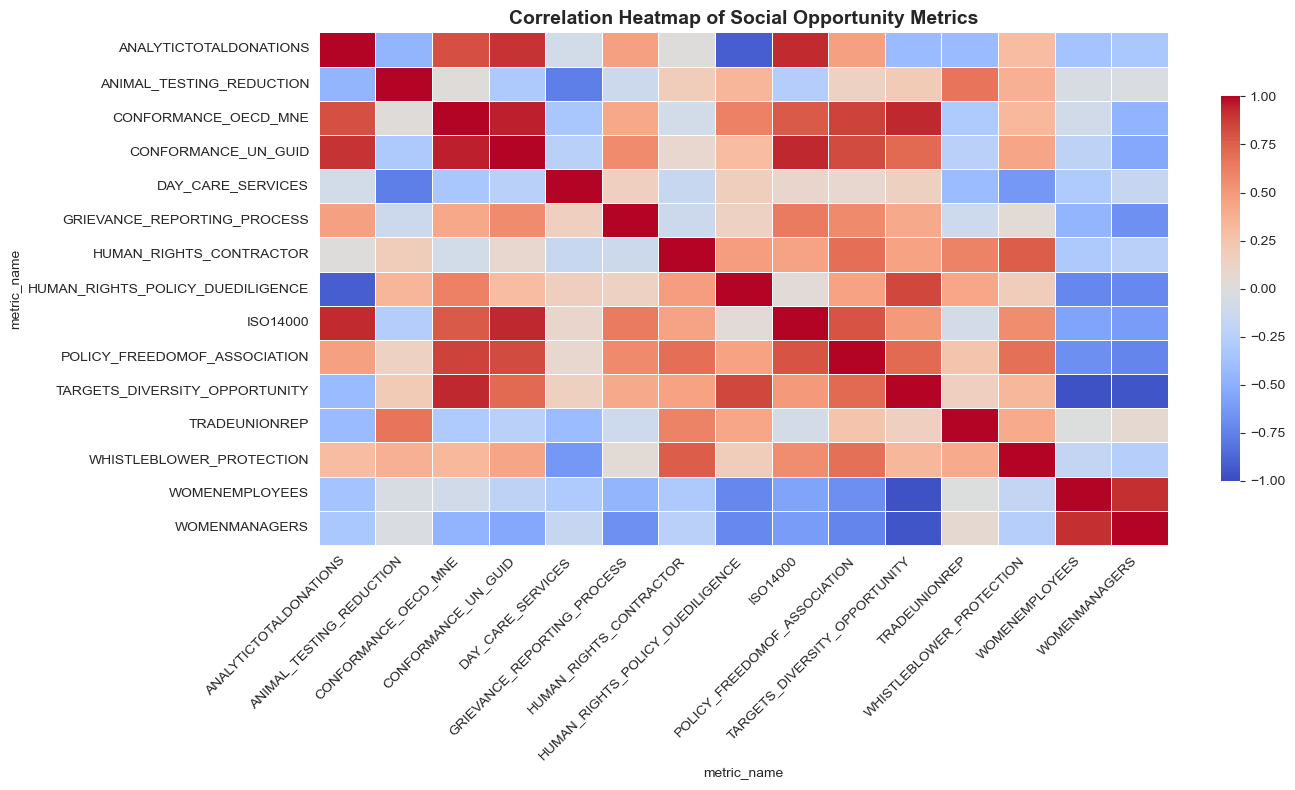


Analyzing Governance Risk Metrics...


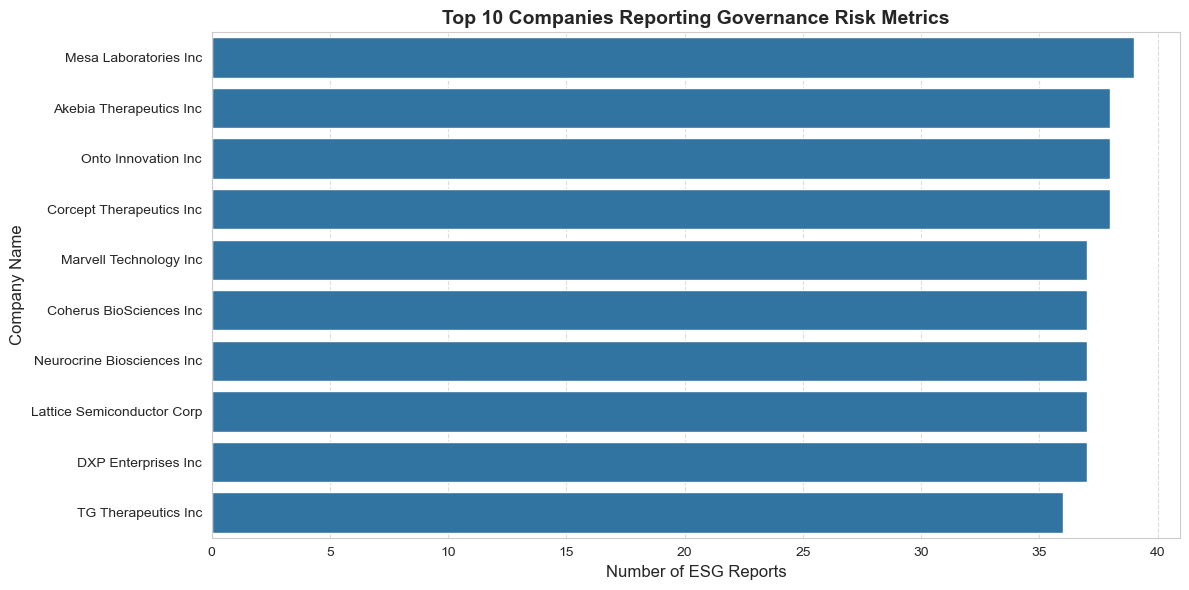

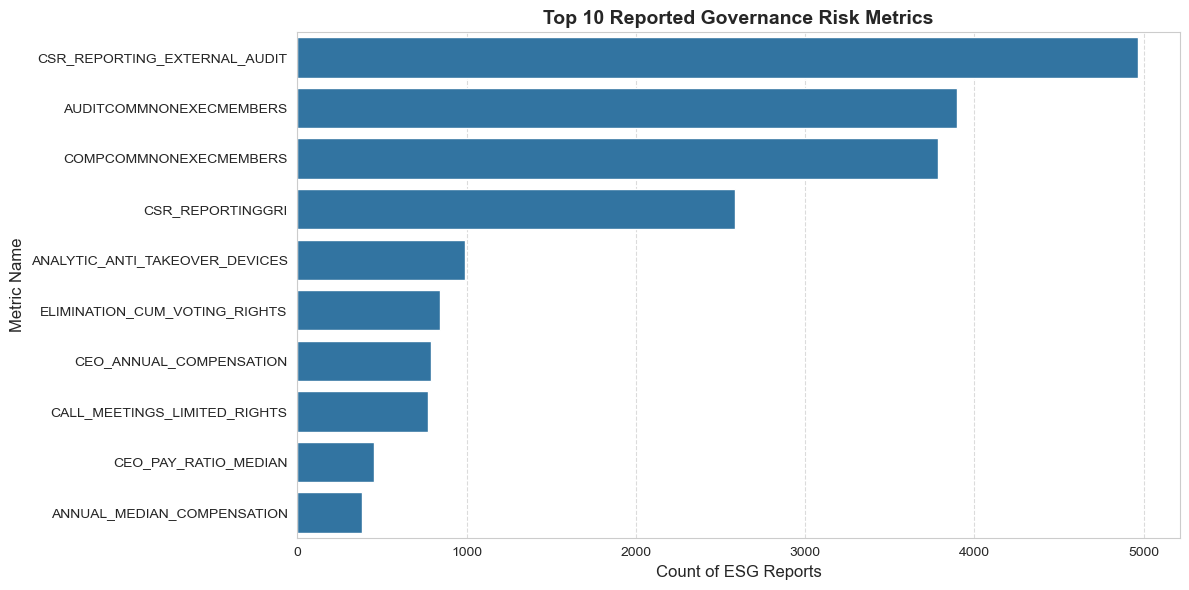

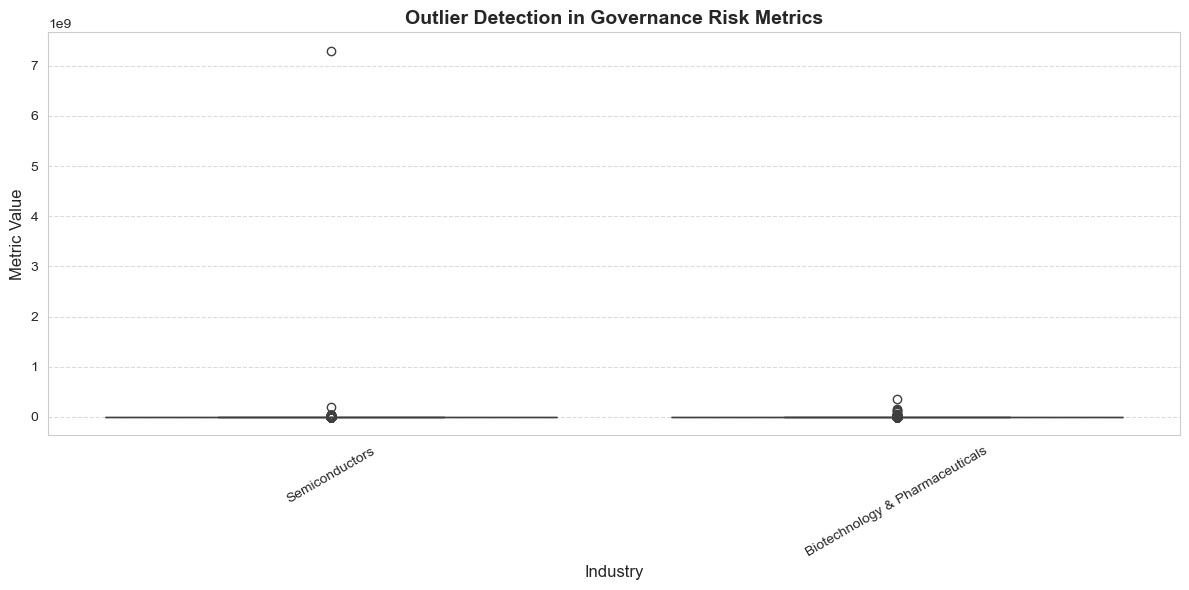

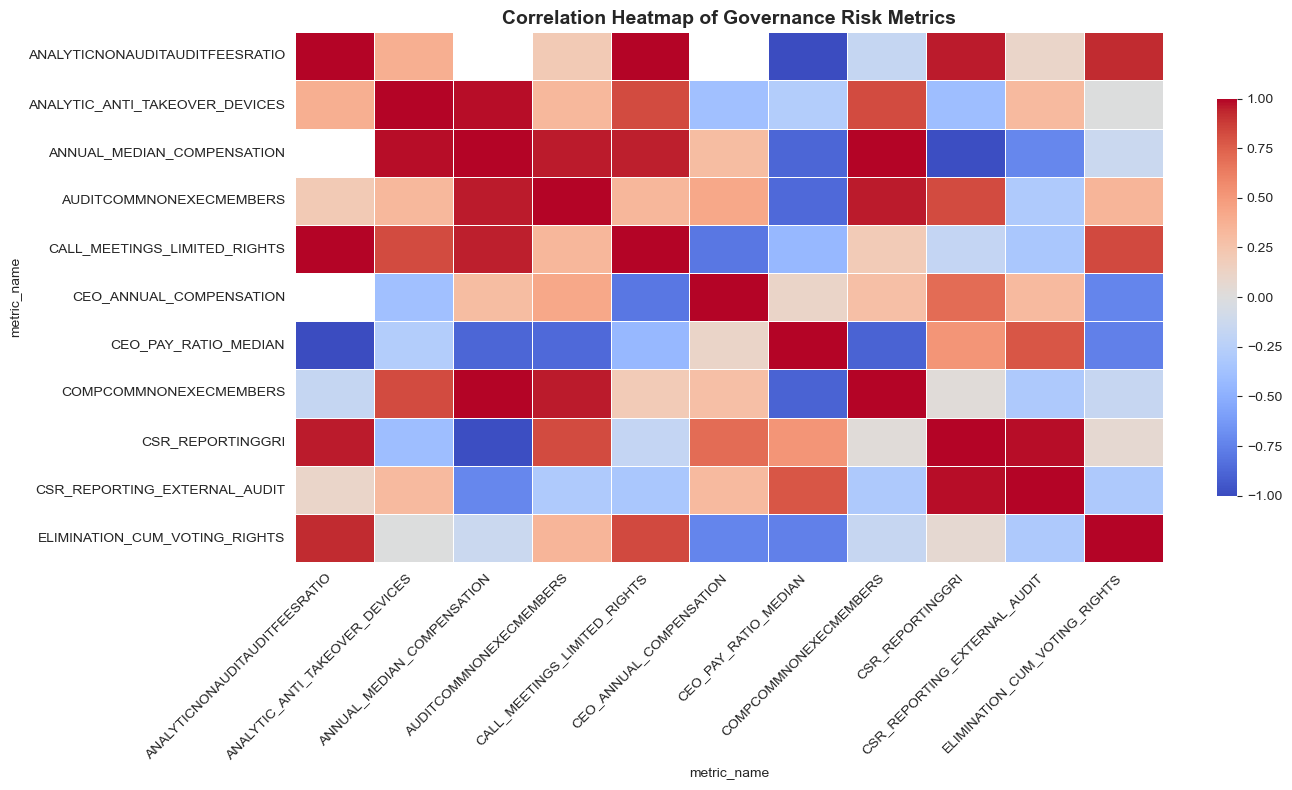


Analyzing Governance Opportunity Metrics...


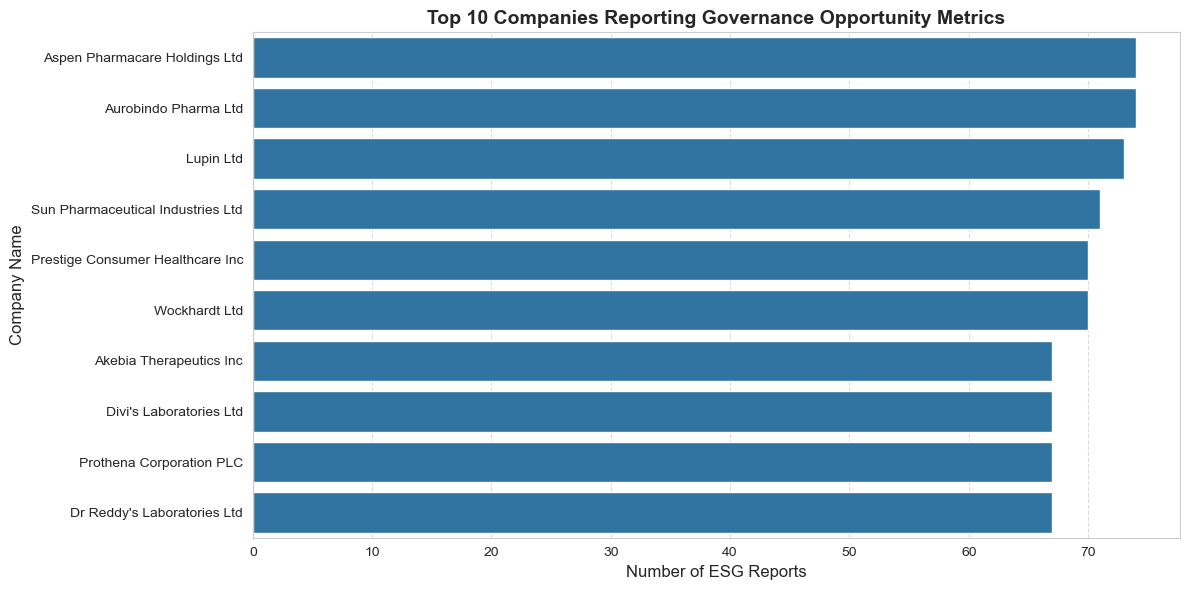

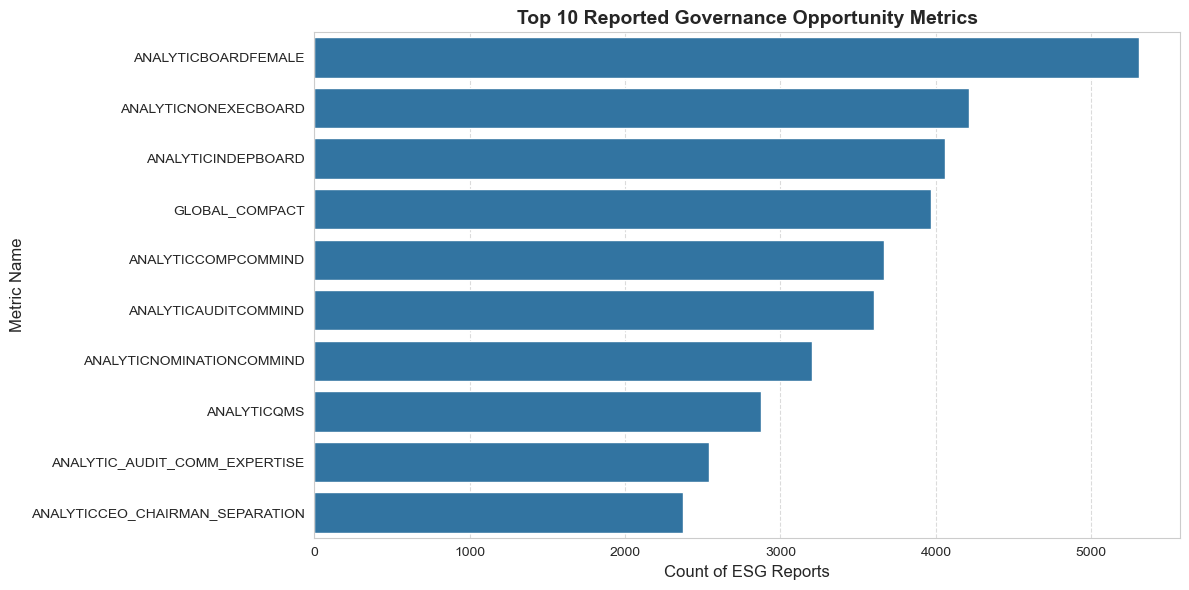

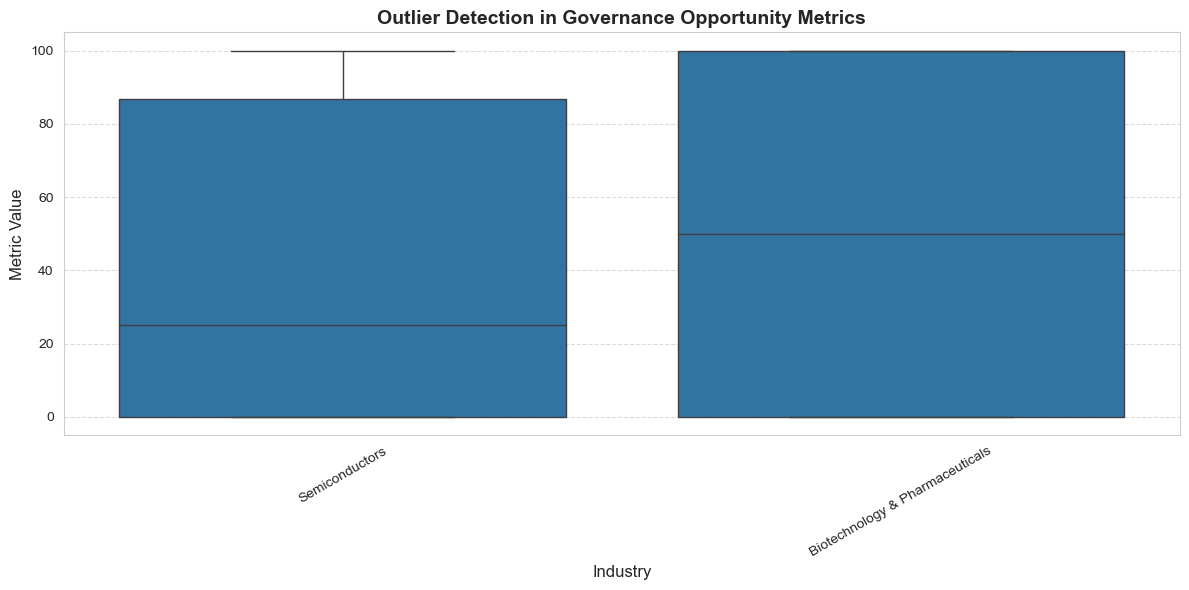

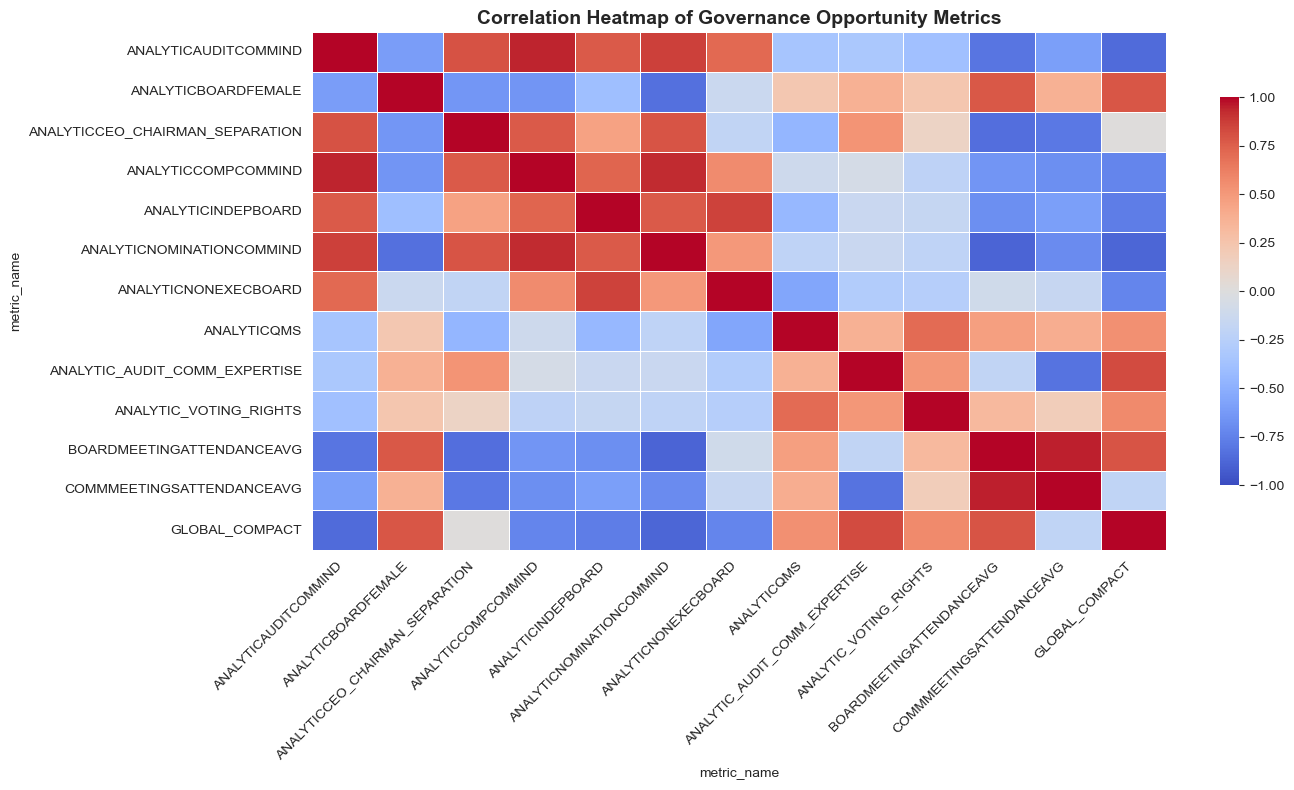

In [30]:
# Run analysis for all ESG categories
print("\nAnalyzing Environmental Risk Metrics...")
plot_esg_metrics(df_env_risk, "Environmental Risk")

print("\nAnalyzing Environmental Opportunity Metrics...")
plot_esg_metrics(df_env_opportunity, "Environmental Opportunity")

print("\nAnalyzing Social Risk Metrics...")
plot_esg_metrics(df_soc_risk, "Social Risk")

print("\nAnalyzing Social Opportunity Metrics...")
plot_esg_metrics(df_soc_opportunity, "Social Opportunity")

print("\nAnalyzing Governance Risk Metrics...")
plot_esg_metrics(df_gov_risk, "Governance Risk")

print("\nAnalyzing Governance Opportunity Metrics...")
plot_esg_metrics(df_gov_opportunity, "Governance Opportunity")

## Step 1: ESG Data Preprocessing – Outlier Removal and Normalization

This step prepares cleaned, industry-filtered ESG datasets for PCA by applying two major preprocessing operations: outlier removal and value normalization.

### Input Files:
The following six ESG datasets are processed:
- Environmental Risk
- Environmental Opportunity
- Social Risk
- Social Opportunity
- Governance Risk
- Governance Opportunity

Each file is read from the `processed_folder_path` and must contain a `metric_value` column.

---

### Processing Steps:

1. **Outlier Removal (`remove_outliers`)**:
   - Applies both **Z-score** filtering (|z| > 3) and **IQR**-based filtering (outside 1.5×IQR bounds).
   - Ensures robust removal of extreme values while retaining core distribution shape.

2. **Normalization (`normalize_data`)**:
   - **Min-Max Scaling** rescales the data to [0, 1] for fair comparison across metrics.
   - **Log Transformation** (`log1p`) is applied to stabilize variance and reduce skewness, especially useful for right-tailed distributions.

---

### Output:
Each processed dataset is saved into a `normalized/` subdirectory under `data/processed/`, with filenames suffixed as `_normalized.csv`.

These transformed datasets are now ready for:
- Yearly aggregation
- Dimensionality reduction (e.g., PCA)
- Ontology-based ESG modeling

In [31]:
# Load cleaned ESG datasets for all metrics
files_to_process = {
    "Environmental Risk": "esg_environmental_risk_cleaned_industry.csv",
    "Environmental Opportunity": "esg_environmental_opportunity_cleaned_industry.csv",
    "Social Risk": "esg_social_risk_cleaned_industry.csv",
    "Social Opportunity": "esg_social_opportunity_cleaned_industry.csv",
    "Governance Risk": "esg_governance_risk_cleaned_industry.csv",
    "Governance Opportunity": "esg_governance_opportunity_cleaned_industry.csv"
}


# Create output folder for normalized data
normalized_folder_path = os.path.join(processed_folder_path, "normalized")
os.makedirs(normalized_folder_path, exist_ok=True)

# Define function for outlier removal
def remove_outliers(df, column):
    """Removes outliers using Z-score and IQR method."""
    if column not in df.columns:
        return df  # Skip if column doesn't exist

    # Z-score method
    df["z_score"] = zscore(df[column], nan_policy="omit")
    df = df[(df["z_score"].abs() <= 3)]  # Remove outliers with |Z| > 3

    # IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    df.drop(columns=["z_score"], inplace=True, errors="ignore")
    return df

# Define function for normalization
def normalize_data(df, column):
    """Normalizes the data using Min-Max Scaling and Log Transformation."""
    if column not in df.columns:
        return df  # Skip if column doesn't exist

    # Min-Max Scaling
    df["metric_value_scaled"] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

    # Log Transformation (only for non-zero values)
    df["metric_value_log"] = np.log1p(df[column])

    return df

# Process each ESG dataset
for category, filename in files_to_process.items():
    file_path = os.path.join(processed_folder_path, filename)
    df = pd.read_csv(file_path, delimiter='|', encoding='utf-8')

    print(f" Processing {category} Data...")

    # Filter numeric values
    df["metric_value"] = pd.to_numeric(df["metric_value"], errors='coerce')
    df.dropna(subset=["metric_value"], inplace=True)

    # Apply outlier removal
    df_cleaned = remove_outliers(df, "metric_value")

    # Apply normalization
    df_normalized = normalize_data(df_cleaned, "metric_value")

    # Save cleaned and normalized data
    output_file = os.path.join(normalized_folder_path, filename.replace(".csv", "_normalized.csv"))
    df_normalized.to_csv(output_file, index=False, sep='|')

    print(f" Saved: {output_file} ({len(df_normalized)} rows)")

print("\n Step 1 Completed: Outliers removed & data normalized! ")

 Processing Environmental Risk Data...
 Saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/data/processed/normalized/esg_environmental_risk_cleaned_industry_normalized.csv (159083 rows)
 Processing Environmental Opportunity Data...
 Saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/data/processed/normalized/esg_environmental_opportunity_cleaned_industry_normalized.csv (41302 rows)
 Processing Social Risk Data...
 Saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/data/processed/normalized/esg_social_risk_cleaned_industry_normalized.csv (48272 rows)
 Processing Social Opportunity Data...
 Saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/data/processed/normalized/esg_social_opportunity_cleaned_industry_normalized.csv (32262 rows)
 Processing Governance Risk Data...
 Saved:

## Step 2: Time Series Analysis of ESG Metrics by Industry

This section visualizes the normalized ESG metric trends over time, grouped by industry, for each ESG subcategory.

### Input:
- Six normalized and industry-filtered datasets:
  - Environmental Risk / Opportunity
  - Social Risk / Opportunity
  - Governance Risk / Opportunity
- Each dataset contains a normalized ESG metric value (`metric_value_scaled`) and the year of reporting.

### Process:

1. **Data Preparation**:
   - Loads each normalized file from `normalized_folder_path`.
   - Ensures `year` and `metric_value_scaled` columns are present and correctly formatted.

2. **Visualization (`plot_time_series_trends`)**:
   - Generates line plots of average normalized ESG metric values per year, grouped by `Industry`.
   - Uses Seaborn’s `lineplot` with color-coded lines to distinguish industries.
   - Each plot is labeled with its ESG category for interpretability.

These plots help identify:
- Temporal trends in ESG disclosures.
- Industry-specific reporting intensity.
- Shifts in ESG metric importance over time.

All results are shown inline for review.


Analyzing Trends for Environmental Risk...


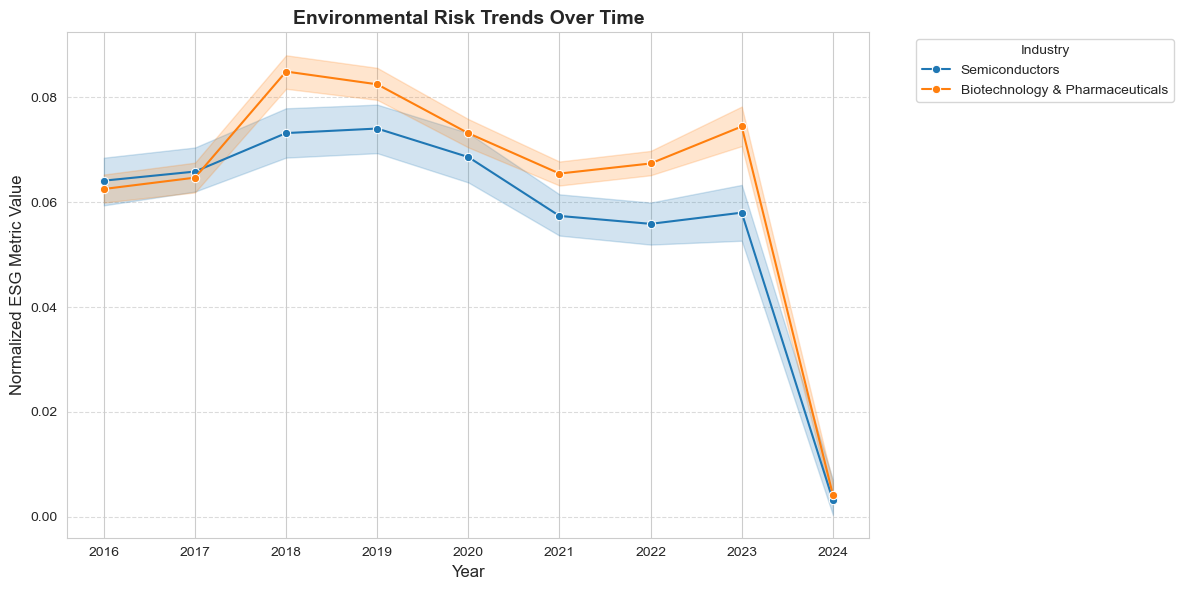


Analyzing Trends for Environmental Opportunity...


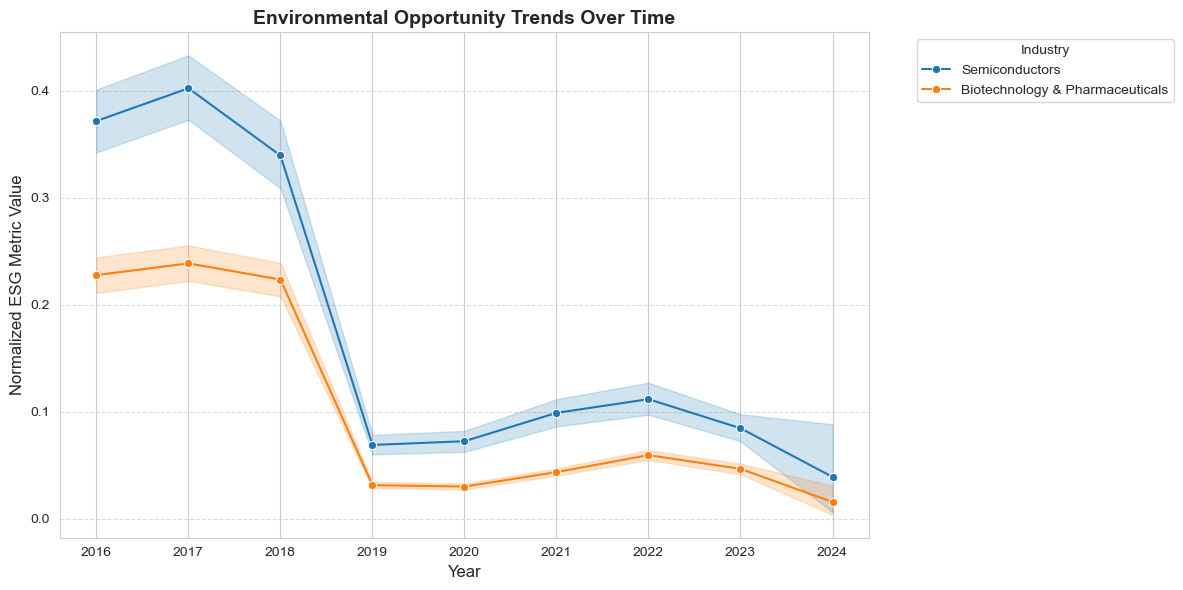


Analyzing Trends for Social Risk...


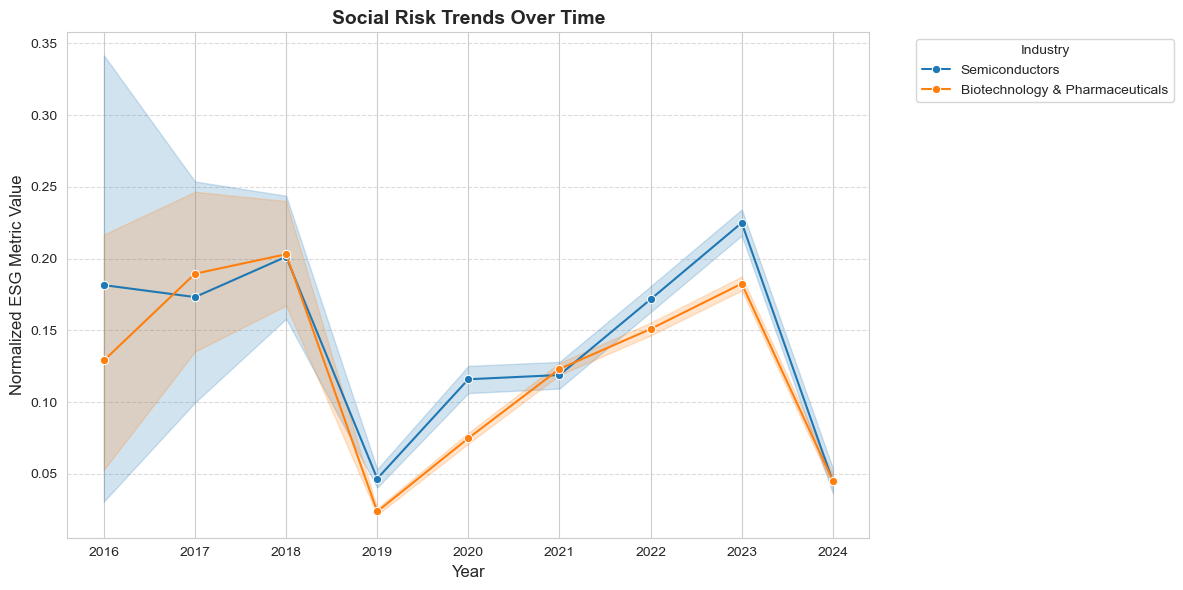


Analyzing Trends for Social Opportunity...


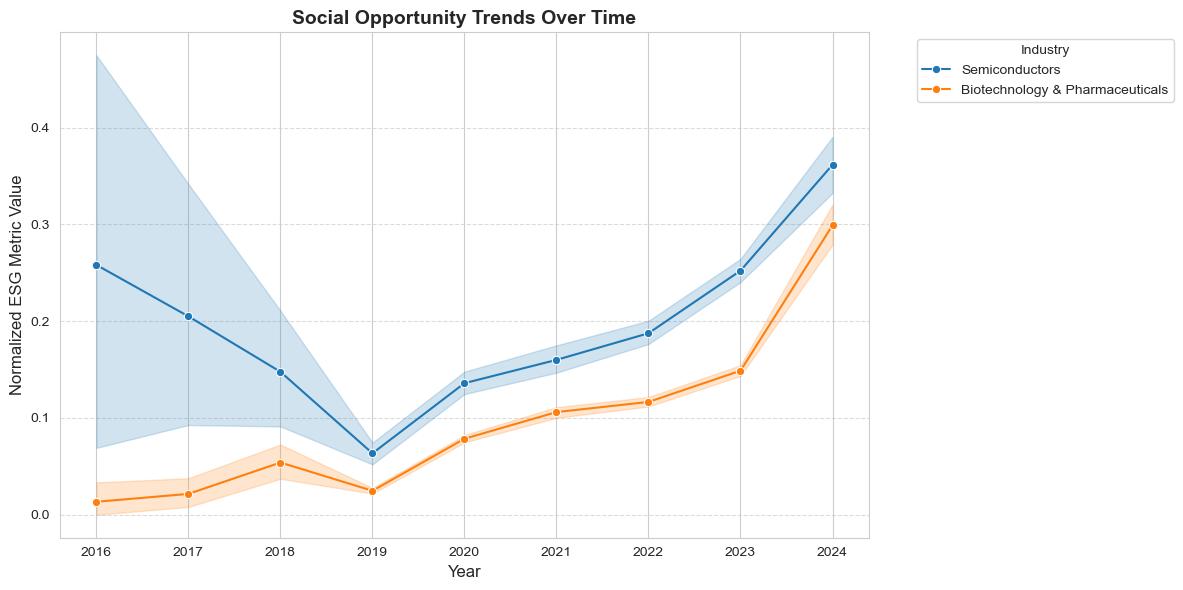


Analyzing Trends for Governance Risk...


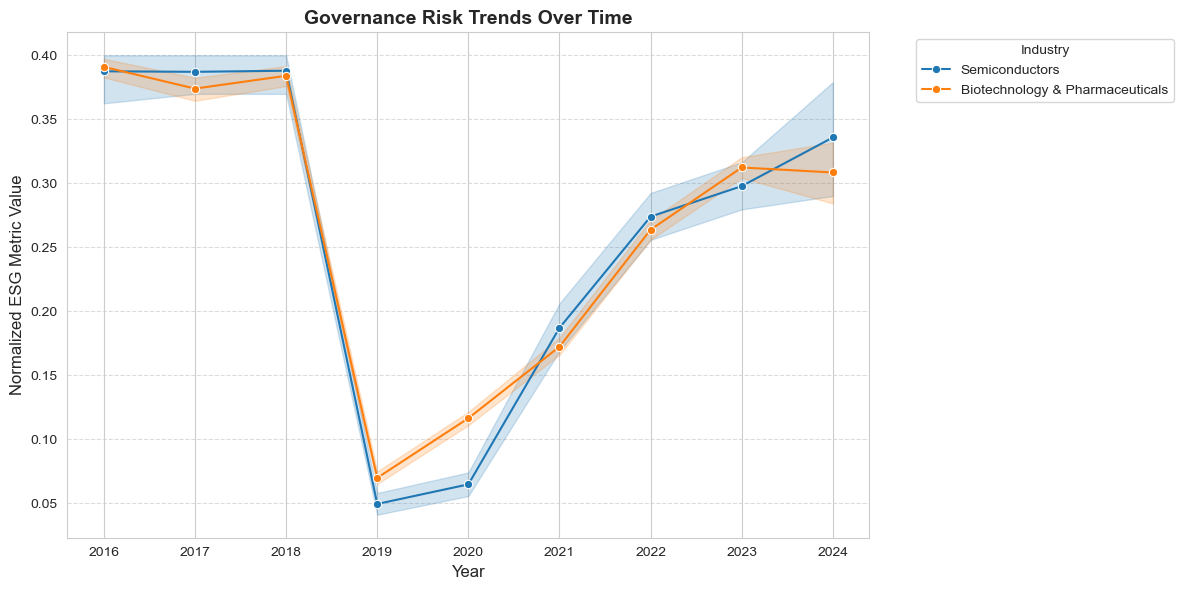


Analyzing Trends for Governance Opportunity...


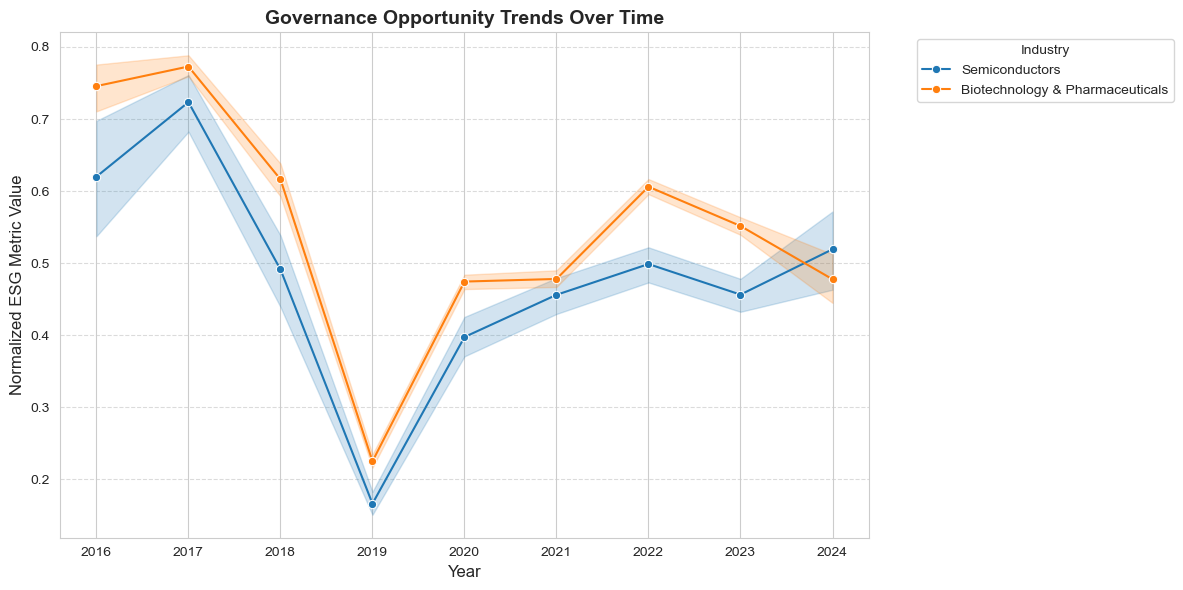


 Step 2 Completed: Time Series Analysis Done! 


In [33]:

# Function to plot time series trends
def plot_time_series_trends(df, category):
    """Plots ESG metric trends over time for different industries."""
    if df.empty or "year" not in df.columns or "metric_value_scaled" not in df.columns:
        print(f" No valid data for {category}")
        return

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x="year", y="metric_value_scaled", hue="Industry", marker="o", palette="tab10")

    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Normalized ESG Metric Value", fontsize=12)
    plt.title(f"{category} Trends Over Time", fontsize=14, fontweight="bold")
    plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

# Analyze trends for each ESG category
for category, filename in normalized_analyzed_files.items():
    file_path = os.path.join(normalized_folder_path, filename)

    # Load data
    df = pd.read_csv(file_path, delimiter='|', encoding='utf-8')

    # Convert year column to numeric
    df["year"] = pd.to_numeric(df["year"], errors="coerce")
    df.dropna(subset=["year", "metric_value_scaled"], inplace=True)

    # Plot time series trends
    print(f"\nAnalyzing Trends for {category}...")
    plot_time_series_trends(df, category)

print("\n Step 2 Completed: Time Series Analysis Done! ")

## Step 3: Industry-Wise Distribution of Normalized ESG Metrics

This step compares ESG metric distributions across different industries using boxplots for each ESG category.

### Input:
Normalized ESG datasets for:
- Environmental Risk / Opportunity
- Social Risk / Opportunity
- Governance Risk / Opportunity

Each file includes:
- `Industry`: the industry to which the company belongs
- `metric_value_scaled`: the normalized ESG metric value (via min-max scaling)

### Process:
1. Loads each normalized ESG dataset from `normalized_folder_path`.
2. Removes rows with missing `Industry` or `metric_value_scaled`.
3. Uses `plot_industry_distribution` to visualize:
   - **Boxplots** of normalized metric values per industry
   - Fliers are hidden (`showfliers=False`) to emphasize the core distribution

### Interpretation:
These plots help assess:
- Variability of ESG reporting within industries
- Presence of consistent trends or anomalies in ESG metric distribution
- Comparative positioning of industries in terms of sustainability emphasis

This analysis supports industry-specific PCA modeling by validating that industries exhibit distinct metric behaviors.


 Analyzing Industry-Wise Distribution for Environmental Risk...


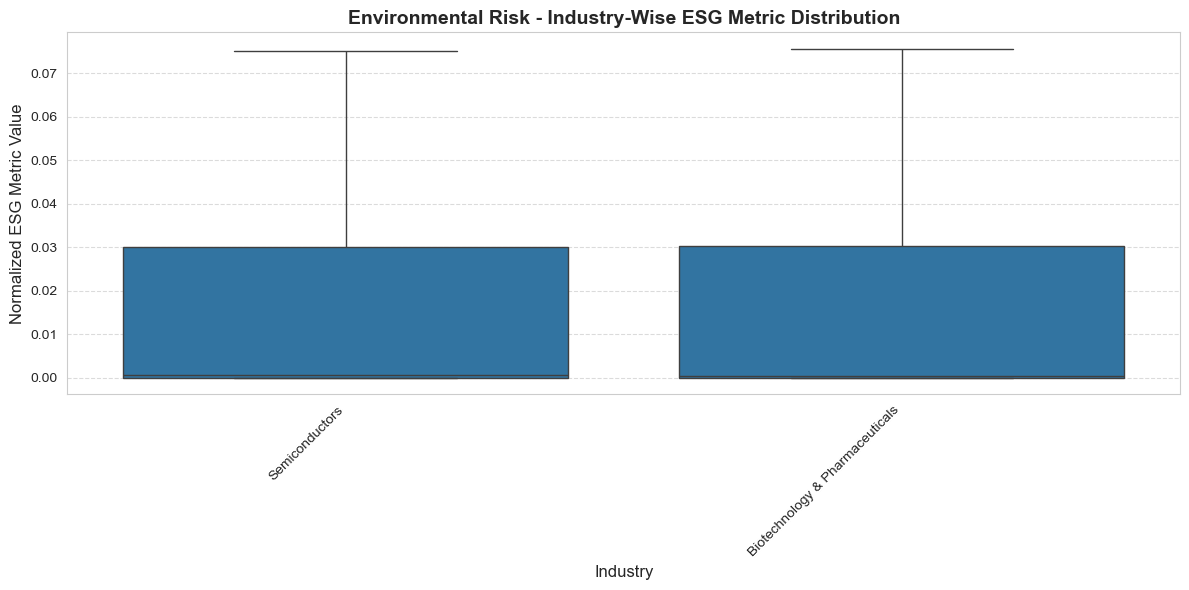


 Analyzing Industry-Wise Distribution for Environmental Opportunity...


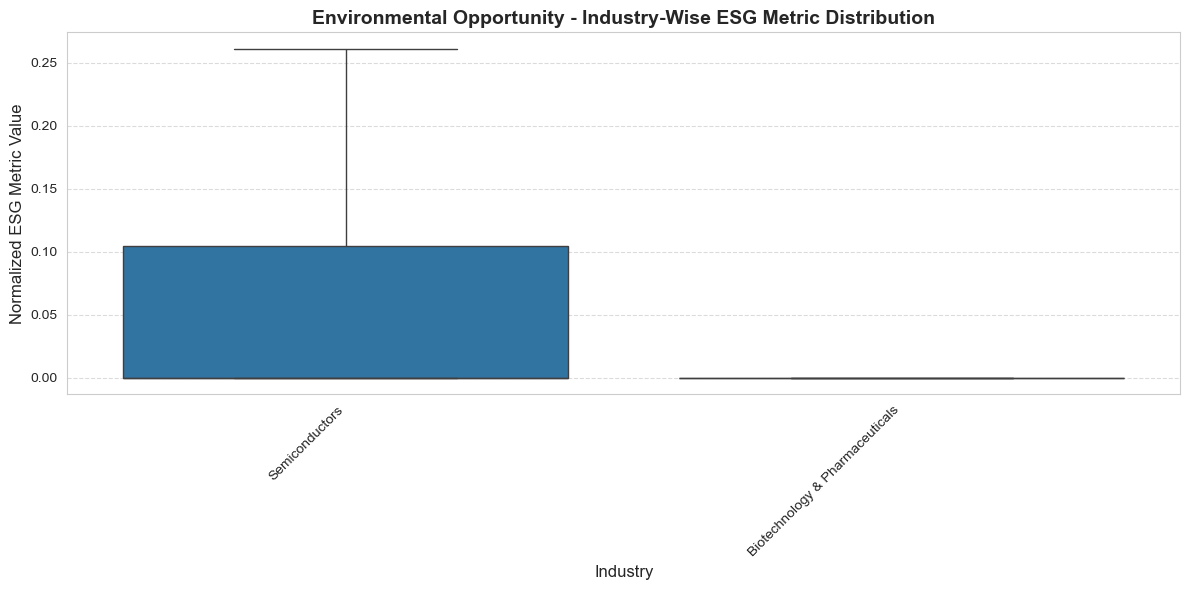


 Analyzing Industry-Wise Distribution for Social Risk...


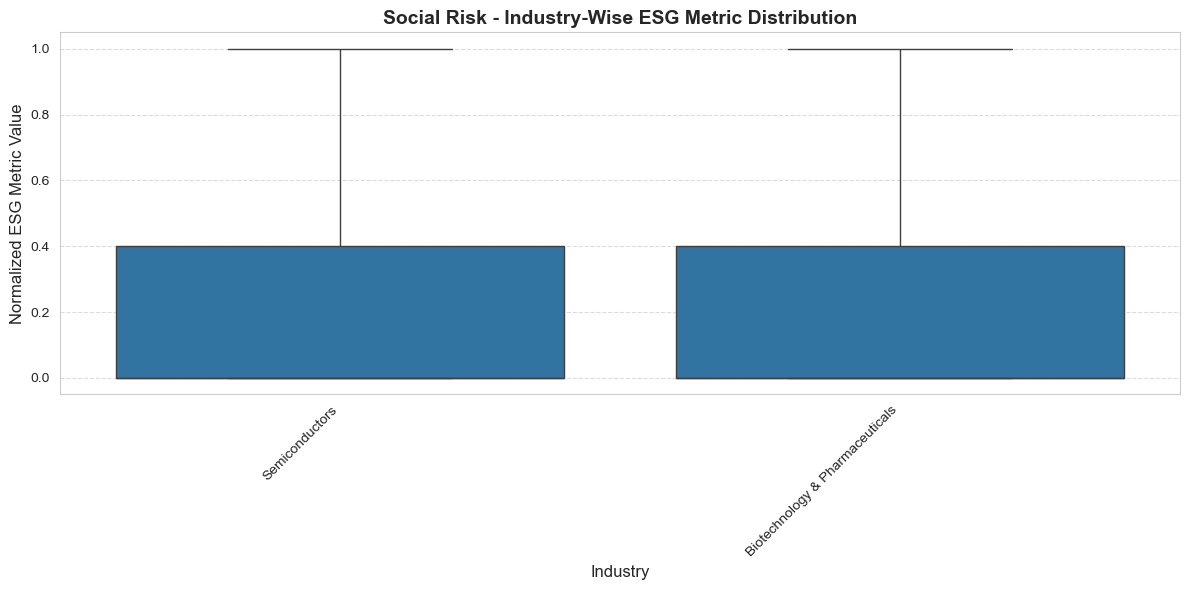


 Analyzing Industry-Wise Distribution for Social Opportunity...


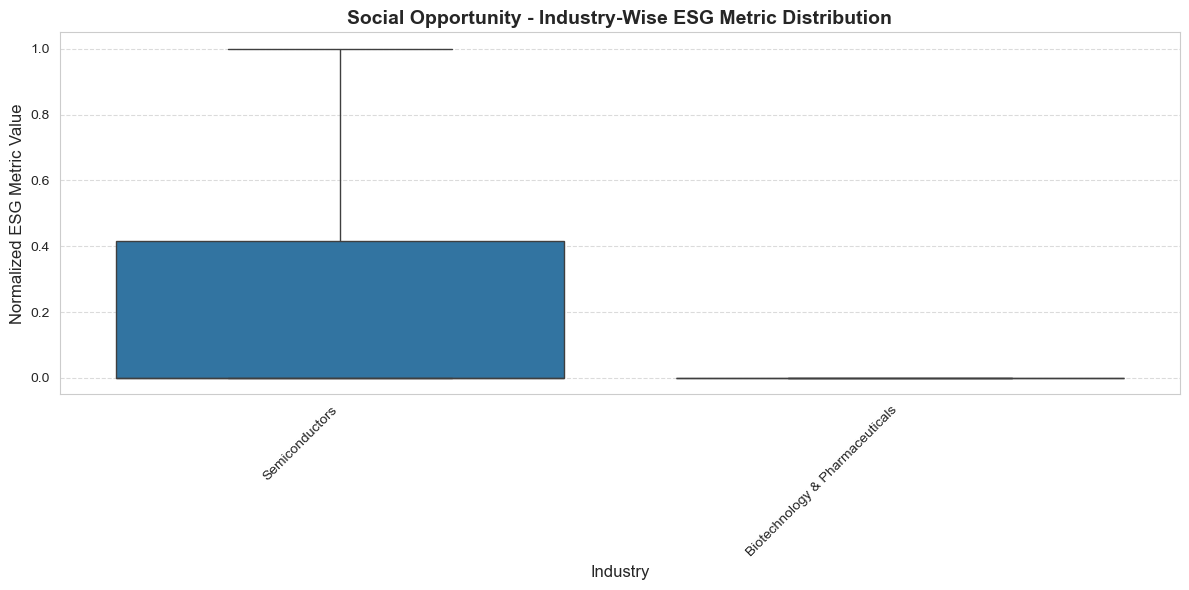


 Analyzing Industry-Wise Distribution for Governance Risk...


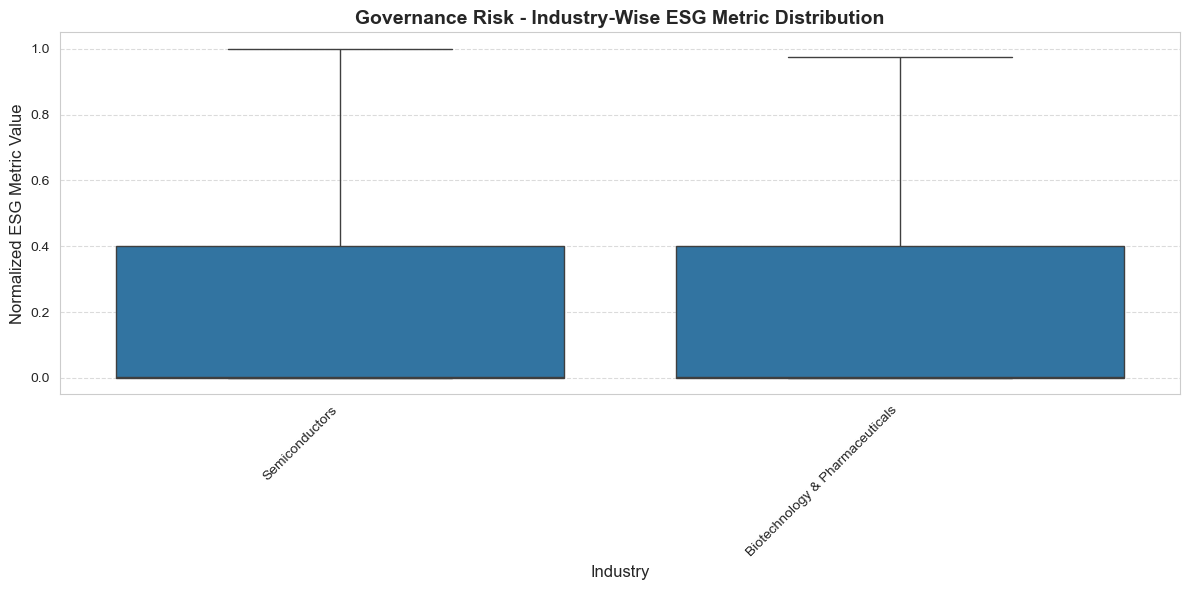


 Analyzing Industry-Wise Distribution for Governance Opportunity...


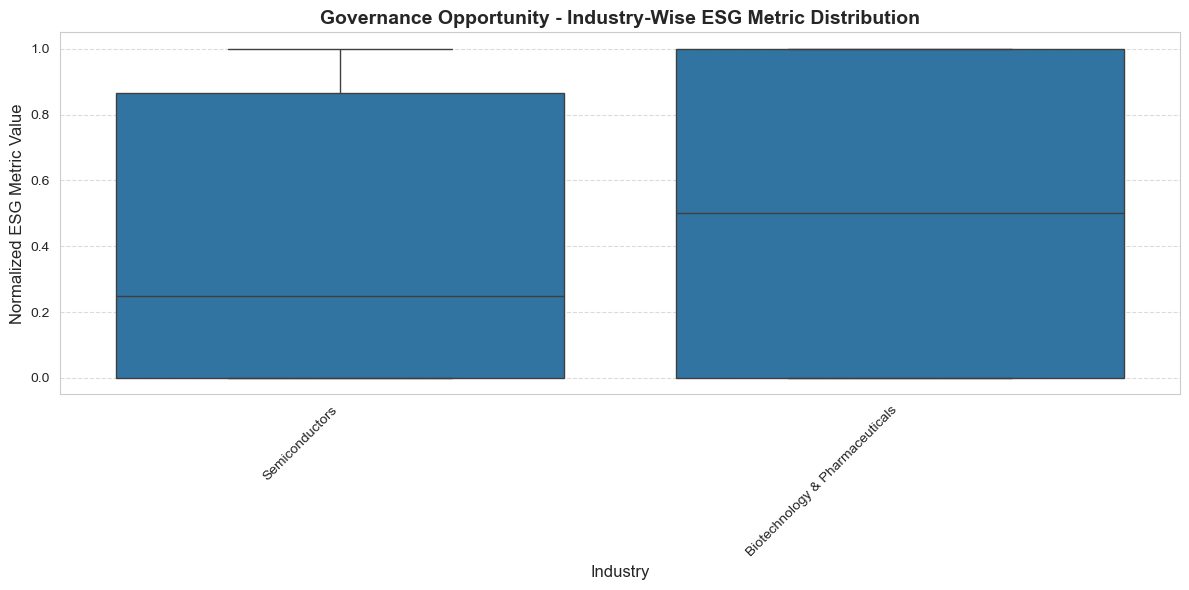


 Step 3 Completed: Industry-Wise ESG Metric Comparison Done!


In [34]:
# Function to compare ESG metric distributions across industries
def plot_industry_distribution(df, category):
    """Plots boxplot distribution of normalized ESG metrics per industry."""
    if df.empty or "Industry" not in df.columns or "metric_value_scaled" not in df.columns:
        print(f" No valid data for {category}")
        return

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x="Industry", y="metric_value_scaled",showfliers=False)

    plt.xlabel("Industry", fontsize=12)
    plt.ylabel("Normalized ESG Metric Value", fontsize=12)
    plt.title(f"{category} - Industry-Wise ESG Metric Distribution", fontsize=14, fontweight="bold")
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# Run industry-wise analysis for each ESG category
for category, filename in normalized_analyzed_files.items():
    file_path = os.path.join(normalized_folder_path, filename)

    # Load data
    df = pd.read_csv(file_path, delimiter='|', encoding='utf-8')

    # Drop missing values
    df.dropna(subset=["Industry", "metric_value_scaled"], inplace=True)

    # Plot industry-wise ESG metric distribution
    print(f"\n Analyzing Industry-Wise Distribution for {category}...")
    plot_industry_distribution(df, category)

print("\n Step 3 Completed: Industry-Wise ESG Metric Comparison Done!")


## Step 4: Correlation Analysis of ESG Metrics

This step computes and visualizes the pairwise correlations among ESG metrics within each category using a heatmap. The goal is to identify metric clusters that exhibit strong positive or negative associations.

### Input:
Each normalized dataset (from `normalized_folder_path`) contains:
- `metric_name`: the name of the ESG metric
- `year`: used as the aggregation index
- `metric_value_scaled`: min-max normalized value

### Process:

1. **Pivoting**:
   - Transforms the dataset into a matrix with `year` as rows and `metric_name` as columns.
   - Uses average values per year for each metric.

2. **Correlation Matrix**:
   - Computes Pearson correlation among metrics.
   - Drops any rows or columns with only NaN values to ensure a valid heatmap.

3. **Visualization**:
   - Plots a correlation heatmap using Seaborn.
   - Values range from -1 to 1, with a diverging color palette (`coolwarm`) centered at 0.
   - Helps detect metric groupings with strong co-variation patterns.

### Outcome:
These visual insights support:
- Dimensionality reduction decisions (e.g., PCA)
- Ontology grouping validation
- Identification of highly redundant or uniquely behaved ESG metrics


 Analyzing Correlation for Environmental Risk...


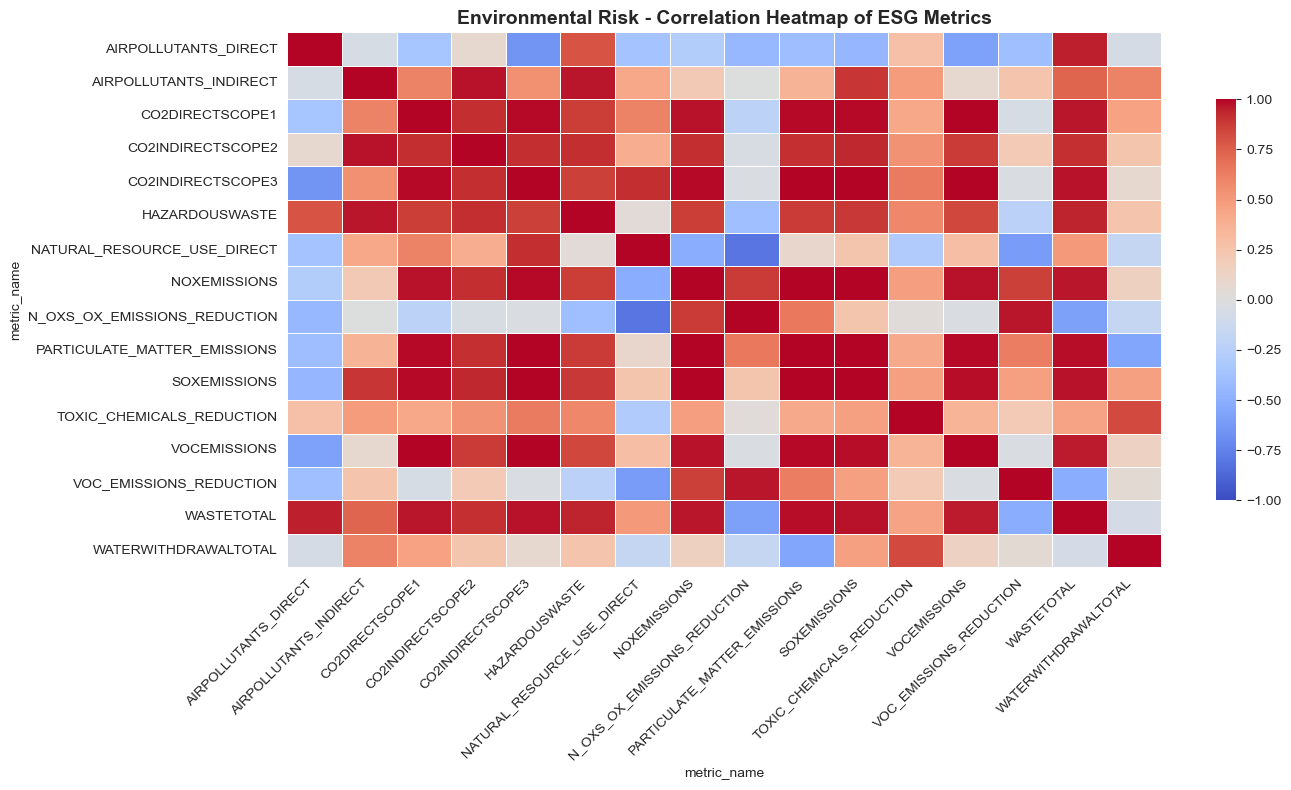


 Analyzing Correlation for Environmental Opportunity...


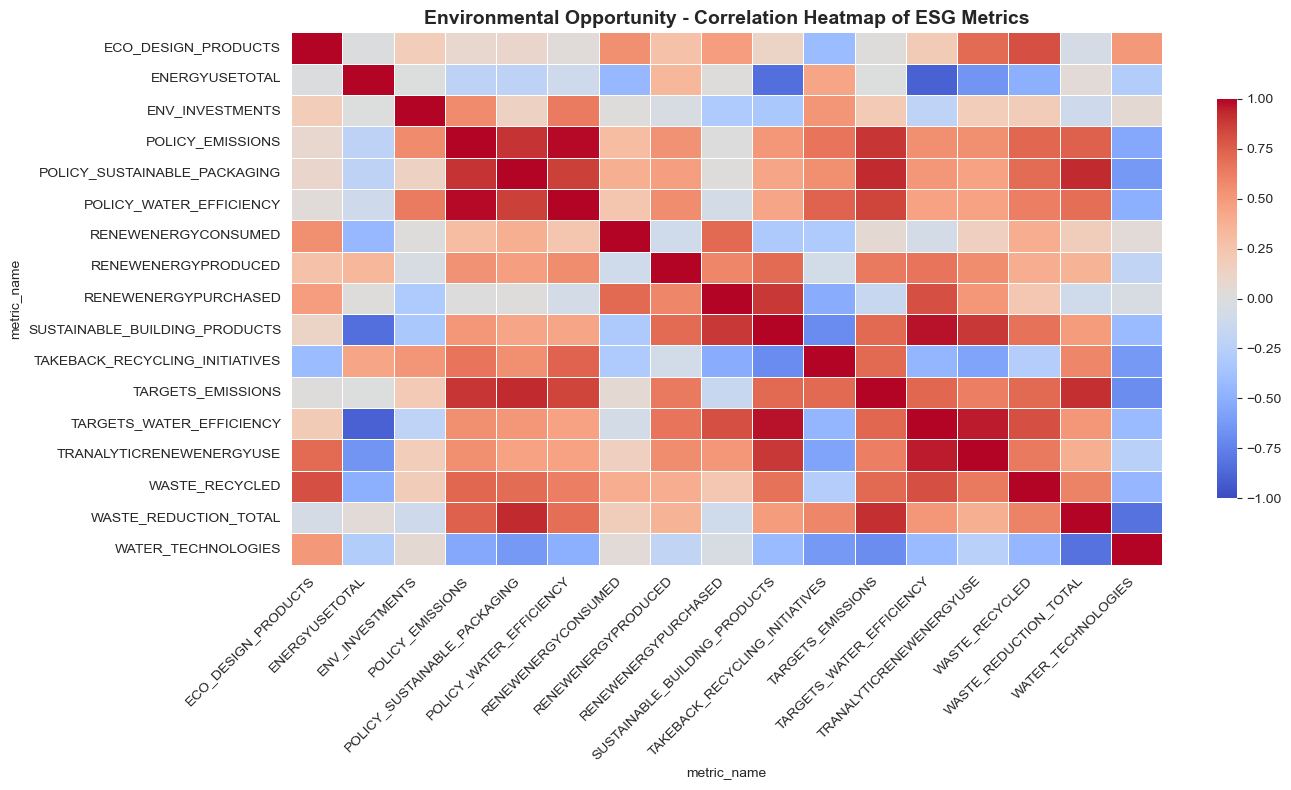


 Analyzing Correlation for Social Risk...


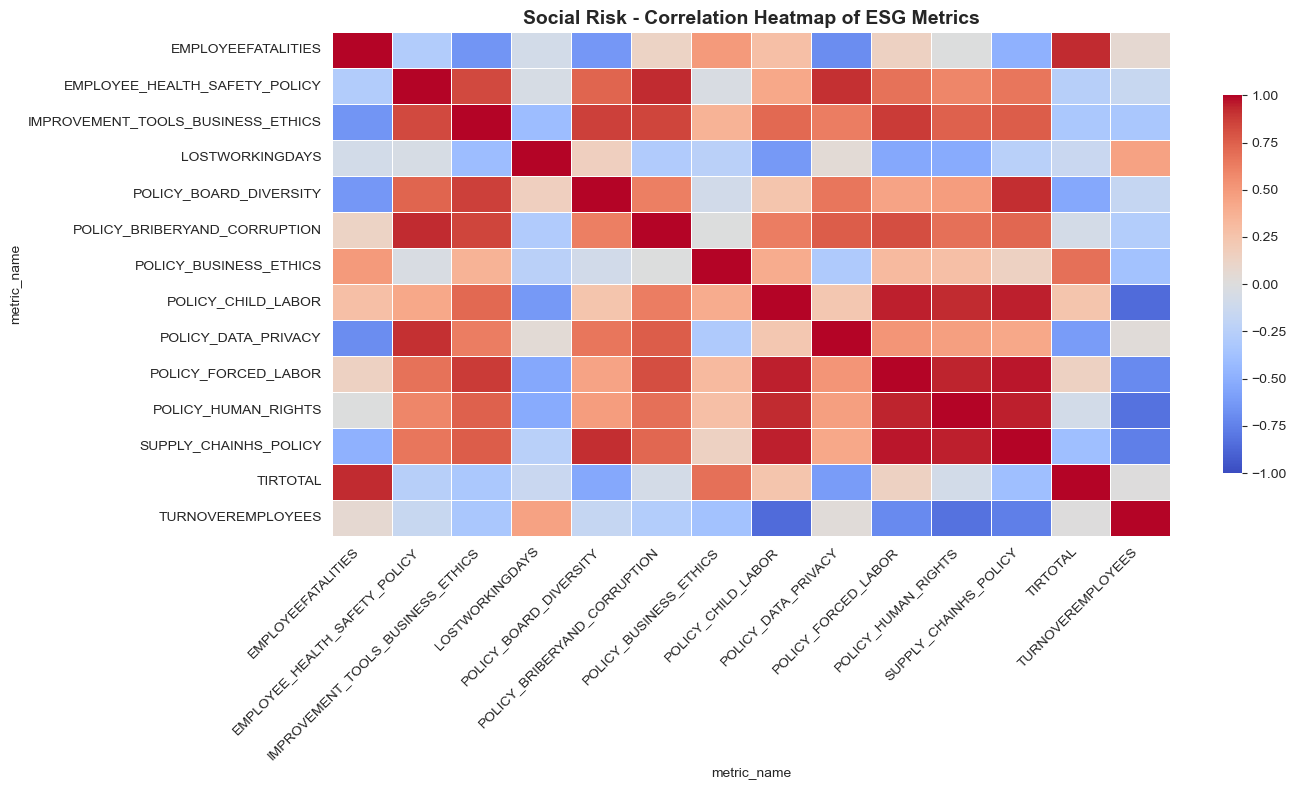


 Analyzing Correlation for Social Opportunity...


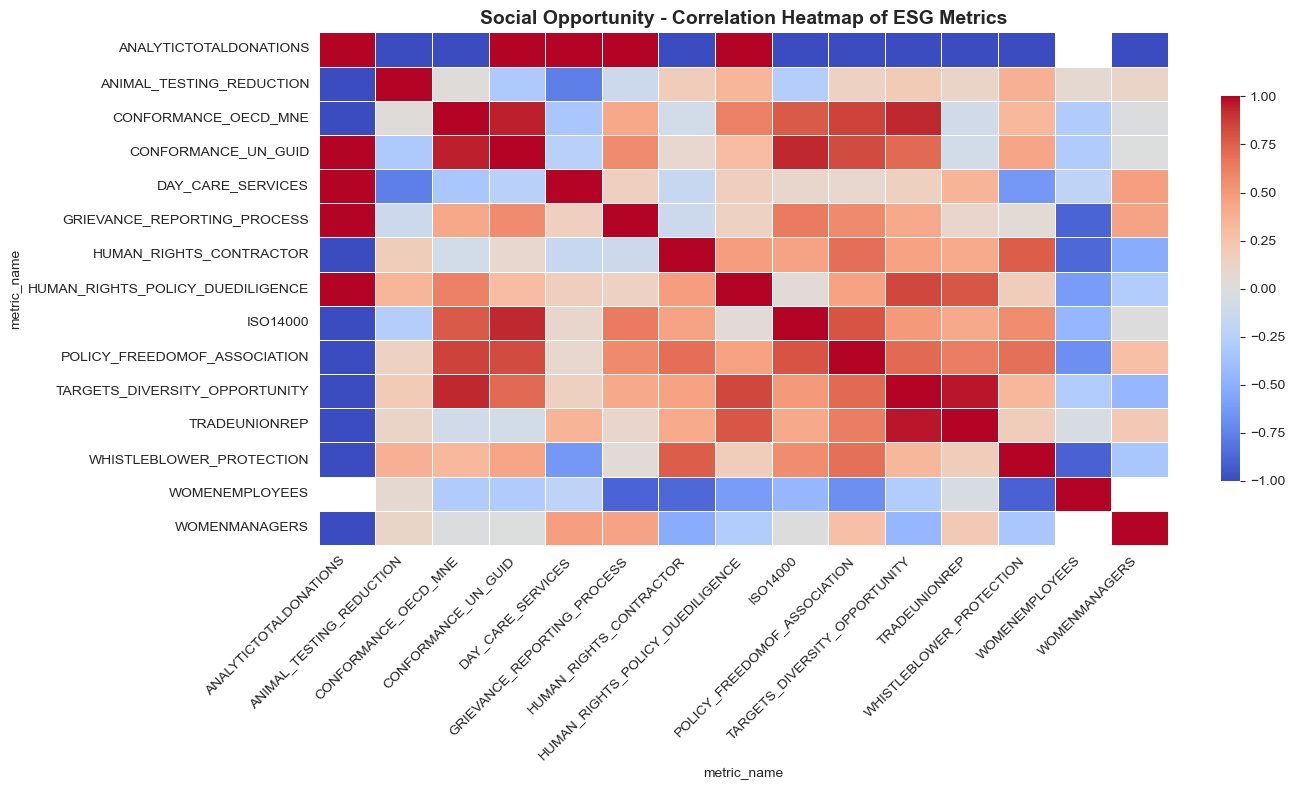


 Analyzing Correlation for Governance Risk...


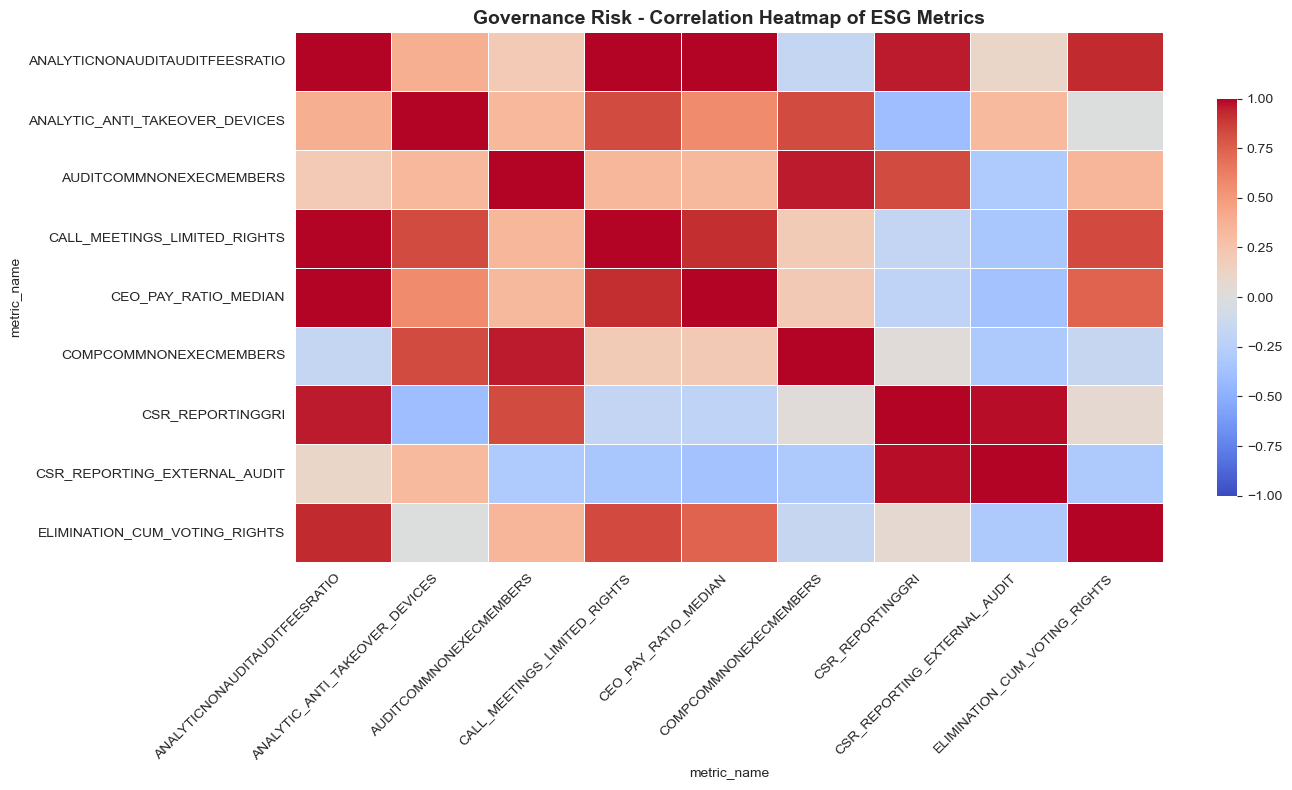


 Analyzing Correlation for Governance Opportunity...


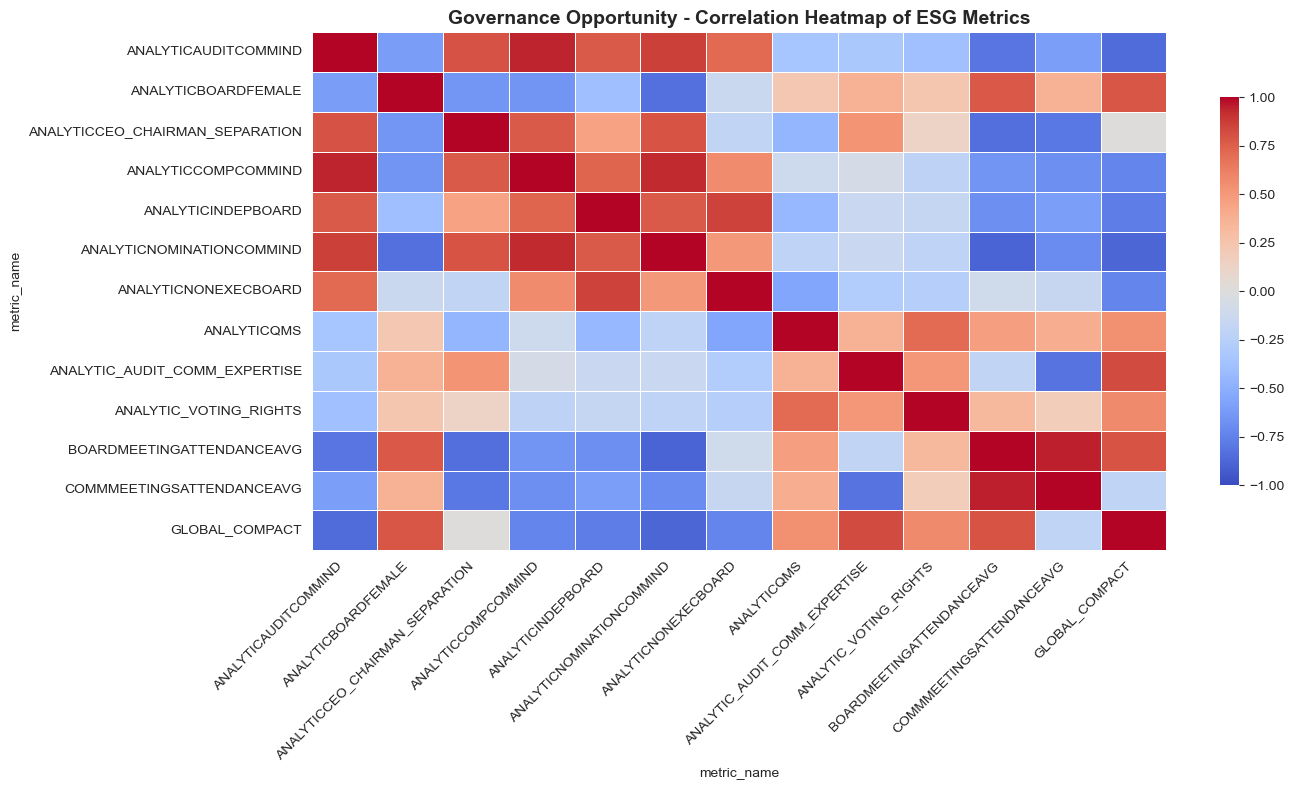


 Step 4 Completed: Correlation Analysis Done!


In [35]:
# Function to plot correlation heatmap of ESG metrics
def plot_correlation_heatmap(df, category):
    """Generates a heatmap of correlation between ESG metrics."""
    if df.empty or "metric_name" not in df.columns or "metric_value_scaled" not in df.columns:
        print(f" No valid data for {category}")
        return

    # Pivot data for correlation matrix
    pivot_df = df.pivot_table(index="year", columns="metric_name", values="metric_value_scaled", aggfunc="mean")

    # Compute correlation
    correlation_matrix = pivot_df.corr().dropna(axis=0, how='all').dropna(axis=1, how='all')

    # Plot heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5, center=0,
                cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1)

    plt.title(f"{category} - Correlation Heatmap of ESG Metrics", fontsize=14, fontweight="bold")
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Run correlation analysis for each ESG category
for category, filename in normalized_analyzed_files.items():
    file_path = os.path.join(normalized_folder_path, filename)

    # Load data
    df = pd.read_csv(file_path, delimiter='|', encoding='utf-8')

    # Drop missing values
    df.dropna(subset=["metric_name", "metric_value_scaled"], inplace=True)

    # Plot correlation heatmap
    print(f"\n Analyzing Correlation for {category}...")
    plot_correlation_heatmap(df, category)

print("\n Step 4 Completed: Correlation Analysis Done!")


## Step 5: Annotating ESG Normalized Files with Pillar Labels

This step updates each normalized ESG file by appending a new `pillar` column that identifies both the ESG dimension (Environmental, Social, or Governance) and the type of metric (Risk or Opportunity).

### Input:
- Normalized ESG datasets located in: `data/processed/normalized/`
- Each file represents a unique ESG subcategory, such as `esg_environmental_risk_cleaned_industry_normalized.csv`

### Process:
1. **Iterate over all normalized files**:
   - Skip files not ending with `.csv`
   - Determine the ESG pillar (`E`, `S`, `G`) based on the filename
   - Determine if the metric is `risk` or `opportunity` based on filename keywords

2. **Add Pillar Column**:
   - Constructs a combined label (e.g., `E_risk`, `S_opportunity`) and assigns it to a new column called `pillar`

3. **Output**:
   - Saves each updated file into `Normalized_Data/` with `_updated_pillar.csv` suffix

### Outcome:
Each file is now ready for:
- Unified downstream merging
- Filtering and grouping based on `pillar`
- Alignment with ontology-driven logic in GraphDB or PCA modeling

In [37]:
# Loop through normalized ESG files and update pillar labels
for file_name in os.listdir(normalized_folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(normalized_folder_path, file_name)

        # Load CSV file
        df = pd.read_csv(file_path, delimiter='|', encoding='utf-8')

        # Determine ESG Pillar (E, S, G)
        if "environmental" in file_name.lower():
            pillar_type = "E"
        elif "social" in file_name.lower():
            pillar_type = "S"
        elif "governance" in file_name.lower():
            pillar_type = "G"
        else:
            continue  # Skip if file doesn't match ESG pillars

        # Determine Risk or Opportunity
        risk_type = "risk" if "risk" in file_name.lower() else "opportunity"

        # Add pillar column in the format 'E_risk', 'S_opportunity', etc.
        df["pillar"] = f"{pillar_type}_{risk_type}"

        # Save the updated file with a suffix
        output_file = os.path.join(updated_pillar_path, file_name.replace(".csv", "_updated_pillar.csv"))
        df.to_csv(output_file, index=False, sep='|')

        print(f"Updated file saved: {output_file}")

Updated file saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/Normalized_Data/esg_social_risk_cleaned_industry_normalized_updated_pillar.csv
Updated file saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/Normalized_Data/esg_social_opportunity_cleaned_industry_normalized_updated_pillar.csv
Updated file saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/Normalized_Data/esg_governance_opportunity_cleaned_industry_normalized_updated_pillar.csv
Updated file saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/Normalized_Data/esg_environmental_risk_cleaned_industry_normalized_updated_pillar.csv
Updated file saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/Normalized_Data/esg_governance_risk_cleaned_industry_normalized_updat

## Step 6: Consolidation of ESG Metrics and Industry-Wise Export

This step merges all six normalized and pillar-tagged ESG datasets into one consolidated DataFrame and then splits the combined data by industry. Each resulting subset is saved as an industry-specific CSV.

### Input:
- Six normalized ESG datasets, already annotated with a `pillar` column (`E_risk`, `S_opportunity`, etc.)
- Files are read from: `Ontology_PCA_Project/Normalized_Data/`

### Process:

1. **File Mapping and Load**:
   - `file_mapping` links each `pillar` (e.g., `E_risk`) to its corresponding CSV.
   - Loads and concatenates all datasets into one combined DataFrame.
   - Re-adds the `pillar` column for consistency after reading each file.

2. **Industry-Based Split**:
   - Inspects the column names to ensure `Industry` is present.
   - Iterates over all unique industry names.
   - For each industry, extracts the subset and saves it to a new CSV file named:  
     `{industry_name}_esg_consolidated.csv`  
     (formatted in lowercase with underscores and ampersands replaced).

### Output:
A set of CSVs—one for each industry—containing the full span of normalized ESG data across all pillars and types.

This format is ideal for:
- Industry-specific dimensionality reduction
- Ontology-enhanced PCA modeling
- Metric aggregation and disclosure comparison

In [39]:
# Use centralized path from config
base_path = updated_pillar_path  # normalized + updated pillar files
output_path = updated_pillar_path  # Save outputs here as well

# File mapping: 6 pillar-specific cleaned ESG files
file_mapping = {
    "E_opportunity": "esg_environmental_opportunity_cleaned_industry_normalized_updated_pillar.csv",
    "E_risk": "esg_environmental_risk_cleaned_industry_normalized_updated_pillar.csv",
    "G_opportunity": "esg_governance_opportunity_cleaned_industry_normalized_updated_pillar.csv",
    "G_risk": "esg_governance_risk_cleaned_industry_normalized_updated_pillar.csv",
    "S_opportunity": "esg_social_opportunity_cleaned_industry_normalized_updated_pillar.csv",
    "S_risk": "esg_social_risk_cleaned_industry_normalized_updated_pillar.csv"
}

# Load and combine all data
combined_df = pd.DataFrame()
for pillar, filename in file_mapping.items():
    file_path = os.path.join(base_path, filename)
    df = pd.read_csv(file_path, delimiter="|")
    df["pillar"] = pillar  # Add/overwrite pillar column
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Check columns for Industry name
print("Columns in combined file:", combined_df.columns)

# Set industry column name
industry_col = "Industry"

# Split and save files by industry
if industry_col in combined_df.columns:
    for industry in combined_df[industry_col].dropna().unique():
        industry_df = combined_df[combined_df[industry_col] == industry]
        filename = industry.lower().replace(" ", "_").replace("&", "and") + "_esg_consolidated.csv"
        output_file = os.path.join(output_path, filename)
        industry_df.to_csv(output_file, index=False, sep='|')
        print(f" Saved: {output_file}")
else:
    print(f"Column '{industry_col}' not found. Please check column names above.")

Columns in combined file: Index(['company_name', 'perm_id', 'data_type', 'disclosure',
       'metric_description', 'metric_name', 'metric_unit', 'metric_value',
       'nb_points_of_observations', 'pillar', 'Industry', 'year',
       'metric_value_scaled', 'metric_value_log'],
      dtype='object')
 Saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/Normalized_Data/semiconductors_esg_consolidated.csv
 Saved: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/Normalized_Data/biotechnology_and_pharmaceuticals_esg_consolidated.csv


## Step 8: SASB Metric Mapping and GHG Unit Normalization (Semiconductors)

This step standardizes ESG metric categories and units using a rule-based mapping system aligned with SASB's disclosure topics for the Semiconductors industry. It cleans and normalizes the consolidated ESG file for semiconductors, preparing it for PCA or ontology-enhanced modeling.

### Input:
- File: `semiconductors_esg_consolidated.csv`
- Path: `Ontology_PCA_Project/Normalized_Data`

### Process Overview:

1. **Column Preparation**:
   - Renames `metric_name` → `category`
   - Drops scaled/log-transformed columns and unnecessary metadata such as `disclosure` or `data_type`

2. **SASB-Based Metric Mapping**:
   - Uses a `mapping_rules` dictionary to convert free-text ESG metric names (e.g., containing "scope1", "diversity", or "ethics") into standardized SASB-aligned categories such as:
     - `GHG_Emissions`
     - `Energy_Management`
     - `Health_Safety`
     - `Business_Ethics`

3. **GHG Emissions Unit Normalization**:
   - Converts various GHG-related units (e.g., `Tons of NOx`, `Tons SOx`) into a consistent metric: `Tons CO2e`
   - Applies conversion factors based on global warming potential (GWP)
   - Standardizes all units accordingly

4. **Filtering**:
   - Removes records where no metric mapping was found, ensuring only SASB-relevant metrics are retained

5. **Output**:
   - Writes the cleaned and standardized dataset to:
     - `semiconductors_sasb_final.csv`

### Purpose:
This structured, SASB-compliant dataset is now suitable for:
- Ontology-based ESG reasoning
- Industry-specific PCA
- Comparison across SASB topics using unified metric definitions

In [41]:
# === File Path ===
file_path = os.path.join(updated_pillar_path, "semiconductors_esg_consolidated.csv")
df = pd.read_csv(file_path, delimiter='|')

# === Rename 'metric_name' → 'category'
df.rename(columns={"metric_name": "category"}, inplace=True)

# === Drop scaled/log columns and unused metadata
df.drop(columns=["metric_value_scaled", "metric_value_log", "data_type", "disclosure"], inplace=True, errors="ignore")

# === Mapping Rules Based on SASB PDF Keywords → Standard Metric Names
mapping_rules = {
    # Environmental
    "co2": "GHG_Emissions",
    "scope1": "GHG_Emissions",
    "scope2": "GHG_Emissions",
    "scope3": "GHG_Emissions",
    "emission": "GHG_Emissions",
    "energy": "Energy_Management",
    "renewable": "Energy_Management",
    "electricity": "Energy_Management",
    "water": "Water_Management",
    "withdrawn": "Water_Management",
    "waste": "Waste_Management",
    "recycle": "Waste_Management",
    "hazardous": "Waste_Management",
    "air": "Air_Quality",

    # Social
    "safety": "Health_Safety",
    "incident": "Health_Safety",
    "fatality": "Health_Safety",
    "lost work": "Health_Safety",
    "training": "Human_Capital_Development",
    "turnover": "Human_Capital_Development",
    "employee": "Human_Capital_Development",
    "diversity": "Diversity_Equity_Inclusion",

    # Governance
    "ethics": "Business_Ethics",
    "anti": "Business_Ethics",
    "bribery": "Business_Ethics",
    "corruption": "Business_Ethics"
}

def map_metric(desc):
    desc = str(desc).lower()
    for keyword, mapped in mapping_rules.items():
        if keyword in desc:
            return mapped
    return None

df["metric"] = df["category"].apply(map_metric)

# === GHG Unit Normalization ===
ghg_conversion_factors = {
    "Tons of NOx": 298,
    "Tons of SOx": 265,
    "Tons of VOC": 86,
    "Tons": 1,
    "Tons CO2e": 1
}

def normalize_ghg(row):
    if row["metric"] == "GHG_Emissions":
        unit = row.get("metric_unit", "")
        val = row.get("metric_value", np.nan)
        factor = ghg_conversion_factors.get(unit, np.nan)
        if pd.notna(factor) and pd.notna(val):
            return val * factor
    return row.get("metric_value", np.nan)

def standardize_unit(row):
    if row["metric"] == "GHG_Emissions":
        return "Tons CO2e"
    return row.get("metric_unit")

df["metric_value"] = df.apply(normalize_ghg, axis=1)
df["metric_unit"] = df.apply(standardize_unit, axis=1)

# === Keep only rows where we successfully mapped the metric ===
df = df[df["metric"].notna()]

# === Export to updated_pillar_path ===
output_path = os.path.join(updated_pillar_path, "semiconductors_sasb_final.csv")
df.to_csv(output_path, index=False)
print(f"Saved cleaned file to: {output_path}")

Saved cleaned file to: /Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/Normalized_Data/semiconductors_sasb_final.csv


## Step 9: SASB-Aligned Mapping for Biotechnology & Pharmaceuticals ESG Metrics

This step cleans and maps ESG metrics from the biotechnology and pharmaceuticals industry to SASB-aligned categories using keyword-based logic. It processes the industry-consolidated ESG dataset to produce a standardised output ready for PCA and ontology-driven modeling.

### Input:
- File: `biotechnology_and_pharmaceuticals_esg_consolidated.csv`
- Path: `Ontology_PCA_Project/Normalized_Data`

### Processing Workflow:

1. **Preprocessing**:
   - Renames `metric_name` to `category`
   - Drops unneeded columns like `metric_value_scaled`, `metric_value_log`, and metadata such as `data_type`, `disclosure`

2. **Keyword-Based Mapping**:
   - Applies rules aligned with SASB's disclosure topics for the biotechnology and pharmaceutical sector
   - Maps keywords like `clinical`, `gmp`, `pricing`, `counterfeit`, etc. to standard labels such as:
     - `Clinical_Trial_Safety`
     - `Drug_Safety`
     - `Affordability_Pricing`
     - `Access_to_Medicine`, etc.

3. **Filtering**:
   - Keeps only rows with successfully mapped metrics
   - Ensures the final dataset contains only SASB-relevant categories

4. **Output**:
   - Final file is saved as: `biopharma_sasb_final.csv` in the same `Normalized_Data` folder

### Purpose:
This file structure supports:
- Clean alignment with SASB ontology categories
- Clear interpretation of ESG disclosure focus areas
- Downstream PCA, clustering, and reasoning workflows based on standard topics

In [43]:
# === File Paths (using your config path variable)
input_path = os.path.join(updated_pillar_path, "biotechnology_and_pharmaceuticals_esg_consolidated.csv")
output_path = os.path.join(updated_pillar_path, "biopharma_sasb_final.csv")

# === Load Dataset
df = pd.read_csv(input_path, delimiter='|')
df.rename(columns={"metric_name": "category"}, inplace=True)
df.drop(columns=["metric_value_scaled", "metric_value_log", "data_type", "disclosure"], inplace=True, errors="ignore")

# === Keyword Mapping Based on SASB Topics for Biopharma
keyword_mapping = {
    # 1. Clinical Trial Safety
    "clinical": "Clinical_Trial_Safety",
    "trial": "Clinical_Trial_Safety",
    "adverse": "Clinical_Trial_Safety",
    "pharmacovigilance": "Clinical_Trial_Safety",
    "inspections": "Clinical_Trial_Safety",

    # 2. Drug Safety
    "recall": "Drug_Safety",
    "fatalit": "Drug_Safety",
    "gmp": "Drug_Safety",
    "violations": "Drug_Safety",
    "side effects": "Drug_Safety",

    # 3. Affordability & Pricing
    "pricing": "Affordability_Pricing",
    "transparency": "Affordability_Pricing",
    "net price": "Affordability_Pricing",
    "affordability": "Affordability_Pricing",
    "price disclosure": "Affordability_Pricing",

    # 4. Counterfeit & Traceability
    "counterfeit": "Counterfeit_Drugs",
    "traceability": "Counterfeit_Drugs",
    "product tracking": "Counterfeit_Drugs",

    # 5. Ethical Marketing
    "marketing": "Ethical_Marketing",
    "off-label": "Ethical_Marketing",
    "promotion": "Ethical_Marketing",
    "sales practice": "Ethical_Marketing",

    # 6. Employee Development
    "employee": "Employee_Development",
    "recruit": "Employee_Development",
    "retention": "Employee_Development",
    "turnover": "Employee_Development",
    "development": "Employee_Development",
    "workforce": "Employee_Development",

    # 7. Supply Chain Management
    "supplier": "Supply_Chain_Management",
    "rx360": "Supply_Chain_Management",
    "audit": "Supply_Chain_Management",
    "third party": "Supply_Chain_Management",

    # 8. Business Ethics
    "bribery": "Business_Ethics",
    "corruption": "Business_Ethics",
    "ethics": "Business_Ethics",
    "compliance": "Business_Ethics",
    "governance": "Business_Ethics",

    # 9. Access to Medicine
    "access": "Access_to_Medicine",
    "medicine": "Access_to_Medicine",
    "availability": "Access_to_Medicine",
    "distribution": "Access_to_Medicine",
    "underserved": "Access_to_Medicine"
}

# === Mapping Function
def map_metric(desc):
    desc = str(desc).lower()
    for keyword, mapped in keyword_mapping.items():
        if keyword in desc:
            return mapped
    return None

# === Apply Mapping and Filter
df["metric"] = df["metric_description"].apply(map_metric)
df = df[df["metric"].notna()].copy()

# === Export Final Mapped File
df.to_csv(output_path, index=False)
print(f"Final Biopharma SASB-aligned file saved to:\n{output_path}")

Final Biopharma SASB-aligned file saved to:
/Users/sujanbharadwaj/Library/Mobile Documents/com~apple~CloudDocs/Documents/Ontology_PCA_Project/Normalized_Data/biopharma_sasb_final.csv
